<a href="https://colab.research.google.com/github/MicheleD-04/Disaster_Survival_Prediction_DL/blob/main/DL_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!apt-get install osmctools -y
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy

import os
import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# ===========================================
# STEP 2: Download and Extract Geofabrik Data
# ===========================================
# Download the Central India OSM extract (PBF file)
!wget https://download.geofabrik.de/asia/india/central-zone-latest.osm.pbf -O central_india.osm.pbf

# ===========================================
# STEP 3: Load OSM Data (Roads, Hospitals, Buildings)
# ===========================================
# Extract hospitals and roads using osmnx
place = "Madhya Pradesh, India"
hospitals = ox.geometries_from_place(place, tags={'amenity': 'hospital'})
roads = ox.graph_from_place(place, network_type='drive')
buildings = ox.geometries_from_place(place, tags={'building': True})

# Convert to GeoDataFrames
roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
hospitals_gdf = hospitals[['geometry']].reset_index(drop=True)
buildings_gdf = buildings[['geometry']].reset_index(drop=True)

# ===========================================
# STEP 4: Create Synthetic Disaster & Demographic Data
# (Replace this with real EM-DAT or WorldPop data later)
# ===========================================
np.random.seed(42)
num_samples = 1000
data = pd.DataFrame({
    'Latitude': np.random.uniform(21.0, 25.0, num_samples),
    'Longitude': np.random.uniform(75.0, 82.0, num_samples),
    'Disaster_Type': np.random.choice(['Earthquake', 'Flood', 'Cyclone'], num_samples),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(1000, 10000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Survived': np.random.choice([0, 1], num_samples)
})

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 5: Compute Derived Features
# (Distance to nearest hospital, etc.)
# ===========================================
def nearest_distance(point, gdf_target):
    return gdf_target.distance(point).min()

gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))

# ===========================================
# STEP 6: Data Preprocessing
# ===========================================
X = gdf.drop(columns=['Survived', 'geometry'])
y = gdf['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ]
)

# ===========================================
# STEP 7: Deep Learning Model (from your PPT)
# ===========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===========================================
# STEP 8: Training Pipeline
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform inputs
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train model
history = model.fit(X_train_processed, y_train, epochs=20, batch_size=32, validation_split=0.1)

# ===========================================
# STEP 9: Evaluation
# ===========================================
y_pred = (model.predict(X_test_processed) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  osmctools
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 155 kB of archives.
After this operation, 443 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 osmctools amd64 0.9-3 [155 kB]
Fetched 155 kB in 1s (193 kB/s)
Selecting previously unselected package osmctools.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../osmctools_0.9-3_amd64.deb ...
Unpacking osmctools (0.9-3) ...
Setting up osmctools (0.9-3) ...
Processing triggers for man-db (2.10.2-1) ...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.6 MB/s eta 0:00:00
--2025-10-17 08:27:30--  https://download.geofabrik.de/asia/india/central-zone-latest.osm.pbf
Resolving download.geofabrik.de (download.geofabrik.de)... 95.217.63.98, 95.216.245.185, 95.216

AttributeError: module 'osmnx' has no attribute 'geometries_from_place'

In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# ===========================================
# STEP 2: Load OSM Data for One State
# ===========================================
place = "Madhya Pradesh, India"

# Hospitals (smaller dataset)
hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})

# Buildings (filter by tag to keep small)
buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})

# Road network (only primary/secondary for performance)
roads = ox.graph_from_place(place, network_type="drive_service", simplify=True)

roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)
buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

print(f"✅ Hospitals: {len(hospitals_gdf)} | Buildings: {len(buildings_gdf)} | Roads: {len(roads_gdf)}")

# ===========================================
# STEP 3: Synthetic Disaster + Demographic Data
# ===========================================
np.random.seed(42)
num_samples = 500  # smaller for Colab
data = pd.DataFrame({
    'Latitude': np.random.uniform(21.0, 25.0, num_samples),
    'Longitude': np.random.uniform(75.0, 82.0, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(1000, 10000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Survived': np.random.choice([0, 1], num_samples)
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Distance to Nearest Hospital
# ===========================================
from shapely.ops import nearest_points

hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    distances = gdf_target.distance(point)
    return distances.min() if len(distances) > 0 else np.nan

print("⚙️ Computing nearest hospital distances...")
gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())

# ===========================================
# STEP 5: Data Preprocessing
# ===========================================
X = gdf.drop(columns=['Survived', 'geometry'])
y = gdf['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# ===========================================
# STEP 6: Deep Learning Model
# ===========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===========================================
# STEP 7: Train/Test Split and Model Training
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

history = model.fit(X_train_proc, y_train, epochs=15, batch_size=16, validation_split=0.1, verbose=1)

# ===========================================
# STEP 8: Evaluation
# ===========================================
y_pred = (model.predict(X_test_proc) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# ===========================================
# STEP 9: Quick Visualization
# ===========================================
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Madhya Pradesh)')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 161 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)
/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 161 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 

⏳ Fetching OSM features for: Bhopal, Madhya Pradesh, India
✅ Loaded: 290 hospitals, 177139 buildings, 170258 road segments
⚙️ Computing distances to nearest hospital...
🚀 Training the model...
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4943 - loss: 0.6996 - val_accuracy: 0.4688 - val_loss: 0.6873
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6369 - loss: 0.6675 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5656 - loss: 0.6709 - val_accuracy: 0.4688 - val_loss: 0.6812
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6307 - loss: 0.6502 - val_accuracy: 0.5000 - val_loss: 0.7027
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6829 - loss: 0.6382 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6693 - loss: 0.6432 - val_accuracy: 0.4375 - val_loss: 0.7046
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

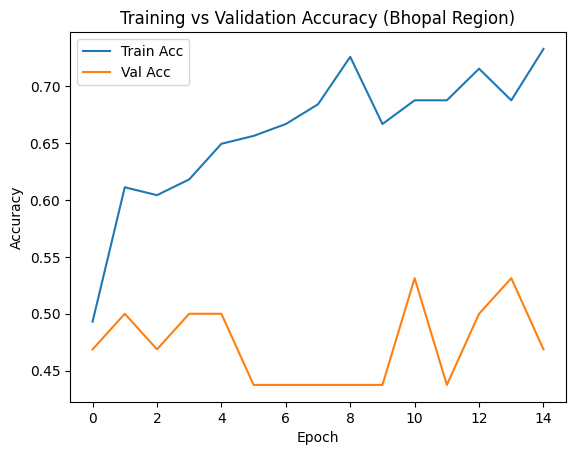

In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ===========================================
# STEP 2: Load OSM Data for Bhopal
# ===========================================
place = "Bhopal, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

# Hospitals (small, focused dataset)
hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})

# Buildings (filter to reduce memory)
buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})

# Road network (lightweight mode)
roads = ox.graph_from_place(place, network_type="drive", simplify=True)

# Convert to GeoDataFrames
roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)
buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")

# ===========================================
# STEP 3: Synthetic Disaster + Demographic Data
# ===========================================
np.random.seed(42)
num_samples = 400  # smaller, faster for Colab
data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Survived': np.random.choice([0, 1], num_samples)
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Distance to Nearest Hospital
# ===========================================
hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return np.nan
    return gdf_target.distance(point).min()

print("⚙️ Computing distances to nearest hospital...")
gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())

# ===========================================
# STEP 5: Preprocessing
# ===========================================
X = gdf.drop(columns=['Survived', 'geometry'])
y = gdf['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# ===========================================
# STEP 6: Deep Learning Model (from PPT)
# ===========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===========================================
# STEP 7: Train/Test Split and Model Training
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print("🚀 Training the model...")
history = model.fit(X_train_proc, y_train, epochs=15, batch_size=16, validation_split=0.1, verbose=1)

# ===========================================
# STEP 8: Evaluation
# ===========================================
y_pred = (model.predict(X_test_proc) > 0.5).astype("int32")
print("\n📊 Model Evaluation Report:\n")
print(classification_report(y_test, y_pred))

# ===========================================
# STEP 9: Accuracy Plot
# ===========================================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Bhopal Region)')
plt.legend()
plt.show()


⏳ Fetching OSM features for: Indore, Madhya Pradesh, India
✅ Loaded: 380 hospitals, 312051 buildings, 172853 road segments
⚙️ Computing distances to nearest hospital...
🚀 Training the model...
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5051 - loss: 0.6979 - val_accuracy: 0.5938 - val_loss: 0.6919
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5877 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.6967
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5644 - loss: 0.6866 - val_accuracy: 0.4688 - val_loss: 0.7006
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.6807 - val_accuracy: 0.4688 - val_loss: 0.7115
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6227 - loss: 0.6702 - val_accuracy: 0.4062 - val_loss: 0.7141
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6294 - loss: 0.6460 - val_accuracy: 0.3750 - val_loss: 0.7185
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

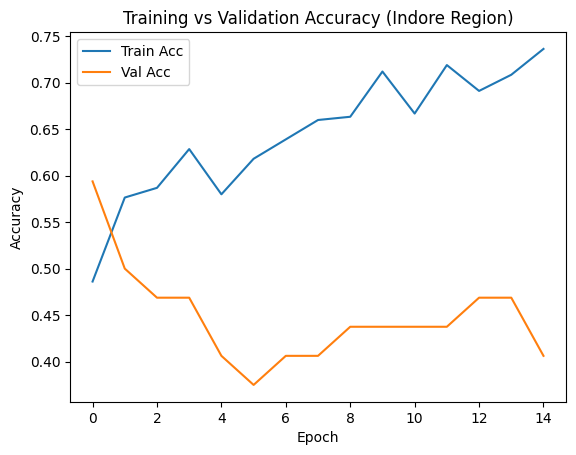

In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ===========================================
# STEP 2: Load OSM Data for Bhopal
# ===========================================
place = "Indore, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

# Hospitals (small, focused dataset)
hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})

# Buildings (filter to reduce memory)
buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})

# Road network (lightweight mode)
roads = ox.graph_from_place(place, network_type="drive", simplify=True)

# Convert to GeoDataFrames
roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)
buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")

# ===========================================
# STEP 3: Synthetic Disaster + Demographic Data
# ===========================================
np.random.seed(42)
num_samples = 400  # smaller, faster for Colab
data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Survived': np.random.choice([0, 1], num_samples)
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Distance to Nearest Hospital
# ===========================================
hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return np.nan
    return gdf_target.distance(point).min()

print("⚙️ Computing distances to nearest hospital...")
gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())

# ===========================================
# STEP 5: Preprocessing
# ===========================================
X = gdf.drop(columns=['Survived', 'geometry'])
y = gdf['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# ===========================================
# STEP 6: Deep Learning Model (from PPT)
# ===========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===========================================
# STEP 7: Train/Test Split and Model Training
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print("🚀 Training the model...")
history = model.fit(X_train_proc, y_train, epochs=15, batch_size=16, validation_split=0.1, verbose=1)

# ===========================================
# STEP 8: Evaluation
# ===========================================
y_pred = (model.predict(X_test_proc) > 0.5).astype("int32")
print("\n📊 Model Evaluation Report:\n")
print(classification_report(y_test, y_pred))

# ===========================================
# STEP 9: Accuracy Plot
# ===========================================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Indore Region)')
plt.legend()
plt.show()


⏳ Fetching OSM features for: Jabalpur, Madhya Pradesh, India
✅ Loaded: 58 hospitals, 338 buildings, 25320 road segments
⚙️ Computing distances to nearest hospital...
🚀 Training the model...
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5101 - loss: 0.6993 - val_accuracy: 0.4375 - val_loss: 0.7076
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5270 - loss: 0.6860 - val_accuracy: 0.3750 - val_loss: 0.7184
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6055 - loss: 0.6661 - val_accuracy: 0.4062 - val_loss: 0.7185
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6409 - loss: 0.6553 - val_accuracy: 0.4688 - val_loss: 0.7179
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6404 - loss: 0.6740 - val_accuracy: 0.4375 - val_loss: 0.7242
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6387 - loss: 0.6402 - val_accuracy: 0.4688 - val_loss: 0.7276
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - a

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step

📊 Model Evaluation Report:

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        42
           1       0.45      0.45      0.45        38

    accuracy                           0.47        80
   macro avg       0.47      0.47      0.47        80
weighted avg       0.47      0.47      0.47        80



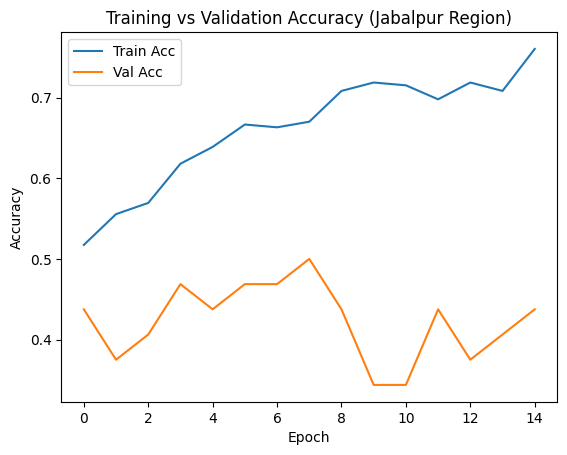

In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ===========================================
# STEP 2: Load OSM Data for Bhopal
# ===========================================
place = "Jabalpur, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

# Hospitals (small, focused dataset)
hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})

# Buildings (filter to reduce memory)
buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})

# Road network (lightweight mode)
roads = ox.graph_from_place(place, network_type="drive", simplify=True)

# Convert to GeoDataFrames
roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)
buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")

# ===========================================
# STEP 3: Synthetic Disaster + Demographic Data
# ===========================================
np.random.seed(42)
num_samples = 400  # smaller, faster for Colab
data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Survived': np.random.choice([0, 1], num_samples)
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Distance to Nearest Hospital
# ===========================================
hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return np.nan
    return gdf_target.distance(point).min()

print("⚙️ Computing distances to nearest hospital...")
gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())

# ===========================================
# STEP 5: Preprocessing
# ===========================================
X = gdf.drop(columns=['Survived', 'geometry'])
y = gdf['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# ===========================================
# STEP 6: Deep Learning Model (from PPT)
# ===========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===========================================
# STEP 7: Train/Test Split and Model Training
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print("🚀 Training the model...")
history = model.fit(X_train_proc, y_train, epochs=15, batch_size=16, validation_split=0.1, verbose=1)

# ===========================================
# STEP 8: Evaluation
# ===========================================
y_pred = (model.predict(X_test_proc) > 0.5).astype("int32")
print("\n📊 Model Evaluation Report:\n")
print(classification_report(y_test, y_pred))

# ===========================================
# STEP 9: Accuracy Plot
# ===========================================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Jabalpur Region)')
plt.legend()
plt.show()

⏳ Fetching OSM features for: Gwalior, Madhya Pradesh, India
✅ Loaded: 95 hospitals, 471 buildings, 102915 road segments
⚙️ Computing distances to nearest hospital...
🚀 Training the model...
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5342 - loss: 0.6977 - val_accuracy: 0.5312 - val_loss: 0.7143
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5503 - loss: 0.6862 - val_accuracy: 0.4375 - val_loss: 0.7055
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6564 - loss: 0.6617 - val_accuracy: 0.3750 - val_loss: 0.7067
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6782 - loss: 0.6435 - val_accuracy: 0.4062 - val_loss: 0.7118
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6567 - loss: 0.6555 - val_accuracy: 0.4062 - val_loss: 0.7236
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6539 - loss: 0.6551 - val_accuracy: 0.4062 - val_loss: 0.7225
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - a

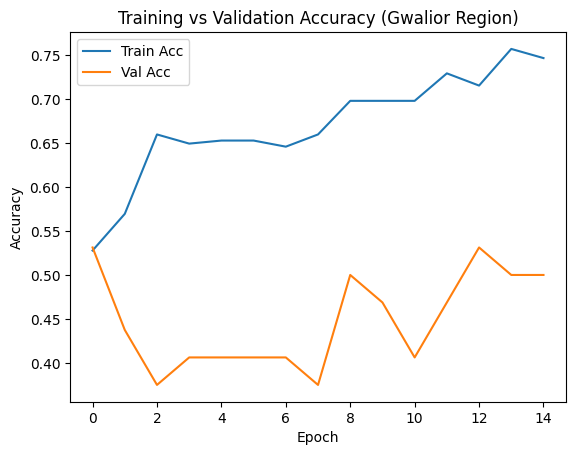

In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ===========================================
# STEP 2: Load OSM Data for Bhopal
# ===========================================
place = "Gwalior, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

# Hospitals (small, focused dataset)
hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})

# Buildings (filter to reduce memory)
buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})

# Road network (lightweight mode)
roads = ox.graph_from_place(place, network_type="drive", simplify=True)

# Convert to GeoDataFrames
roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)
buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")

# ===========================================
# STEP 3: Synthetic Disaster + Demographic Data
# ===========================================
np.random.seed(42)
num_samples = 400  # smaller, faster for Colab
data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Survived': np.random.choice([0, 1], num_samples)
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Distance to Nearest Hospital
# ===========================================
hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return np.nan
    return gdf_target.distance(point).min()

print("⚙️ Computing distances to nearest hospital...")
gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())

# ===========================================
# STEP 5: Preprocessing
# ===========================================
X = gdf.drop(columns=['Survived', 'geometry'])
y = gdf['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# ===========================================
# STEP 6: Deep Learning Model (from PPT)
# ===========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===========================================
# STEP 7: Train/Test Split and Model Training
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print("🚀 Training the model...")
history = model.fit(X_train_proc, y_train, epochs=15, batch_size=16, validation_split=0.1, verbose=1)

# ===========================================
# STEP 8: Evaluation
# ===========================================
y_pred = (model.predict(X_test_proc) > 0.5).astype("int32")
print("\n📊 Model Evaluation Report:\n")
print(classification_report(y_test, y_pred))

# ===========================================
# STEP 9: Accuracy Plot
# ===========================================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Gwalior Region)')
plt.legend()
plt.show()

⏳ Fetching OSM features for: Ujjain, Madhya Pradesh, India
✅ Loaded: 41 hospitals, 631 buildings, 58500 road segments
⚙️ Computing distances to nearest hospital...
🚀 Training the model...
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.4875 - loss: 0.6998 - val_accuracy: 0.4688 - val_loss: 0.7031
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5617 - loss: 0.6854 - val_accuracy: 0.5312 - val_loss: 0.7087
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6059 - loss: 0.6687 - val_accuracy: 0.4688 - val_loss: 0.7176
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6149 - loss: 0.6570 - val_accuracy: 0.4688 - val_loss: 0.7273
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5972 - loss: 0.6463 - val_accuracy: 0.4375 - val_loss: 0.7336
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7068 - loss: 0.6077 - val_accuracy: 0.4062 - val_loss: 0.7432
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc

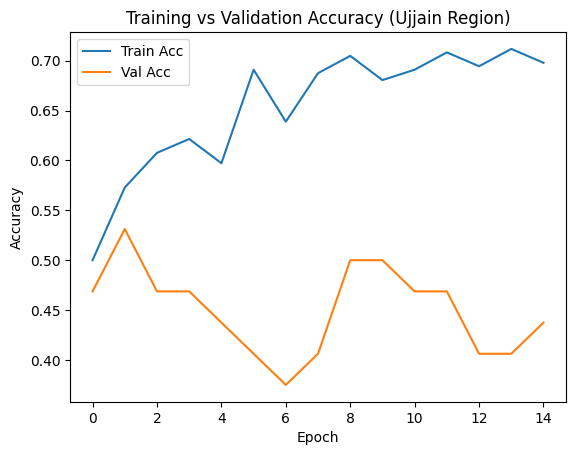

In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ===========================================
# STEP 2: Load OSM Data for Bhopal
# ===========================================
place = "Ujjain, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

# Hospitals (small, focused dataset)
hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})

# Buildings (filter to reduce memory)
buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})

# Road network (lightweight mode)
roads = ox.graph_from_place(place, network_type="drive", simplify=True)

# Convert to GeoDataFrames
roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)
hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)
buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")

# ===========================================
# STEP 3: Synthetic Disaster + Demographic Data
# ===========================================
np.random.seed(42)
num_samples = 400  # smaller, faster for Colab
data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Survived': np.random.choice([0, 1], num_samples)
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Distance to Nearest Hospital
# ===========================================
hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return np.nan
    return gdf_target.distance(point).min()

print("⚙️ Computing distances to nearest hospital...")
gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())

# ===========================================
# STEP 5: Preprocessing
# ===========================================
X = gdf.drop(columns=['Survived', 'geometry'])
y = gdf['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender']
numerical = [col for col in X.columns if col not in categorical]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# ===========================================
# STEP 6: Deep Learning Model (from PPT)
# ===========================================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===========================================
# STEP 7: Train/Test Split and Model Training
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

print("🚀 Training the model...")
history = model.fit(X_train_proc, y_train, epochs=15, batch_size=16, validation_split=0.1, verbose=1)

# ===========================================
# STEP 8: Evaluation
# ===========================================
y_pred = (model.predict(X_test_proc) > 0.5).astype("int32")
print("\n📊 Model Evaluation Report:\n")
print(classification_report(y_test, y_pred))

# ===========================================
# STEP 9: Accuracy Plot
# ===========================================
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Ujjain Region)')
plt.legend()
plt.show()

⏳ Fetching OSM features for: Ujjain, Madhya Pradesh, India
✅ Loaded: 41 hospitals, 631 buildings, 58500 road segments

📊 Generating 1000 synthetic data points...
⚙️ Computing spatial features...
✅ Spatial features computed
🎯 Generating realistic survival labels based on risk factors...
✅ Survival distribution: {1: 600, 0: 400}
   Survival rate: 60.0%

🔧 Feature engineering...
📊 Features: 11 numerical, 4 categorical

🚀 Training with 5-Fold Cross-Validation...

📊 Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.8000 | AUC: 0.8753 | Precision: 0.8448 | Recall: 0.8167

📊 Fold 2/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.8400 | AUC: 0.8698 | Precision: 0.8607 | Recall: 0.8750

📊 Fold 3/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7750 | AUC: 0.8649 | Precision: 0.8205 | Recall: 0.8000

📊 Fold 4/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7700 | AUC: 0.8295 | Precision: 0.8426 | Recall: 0.7583

📊 Fold 5/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7700 | AUC: 0.8276 | Precision: 0.7761 | Recall: 0.8667

📈 CROSS-VALIDATION RESULTS
Accuracy    : 0.7910 ± 0.0269
Auc         : 0.8534 ± 0.0206
Precision   : 0.8289 ± 0.0293
Recall      : 0.8233 ± 0.0433

🎯 Training Final Model on 80/20 Split
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5479 - auc: 0.5887 - loss: 1.0926 - precision: 0.7079 - recall: 0.4236 - val_accuracy: 0.7312 - val_auc: 0.8333 - val_loss: 0.9331 - val_precision: 0.7477 - val_recall: 0.8333 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6854 - auc: 0.7876 - loss: 0.8661 - precision: 0.8180 - recall: 0.6151 - val_accuracy: 0.7625 - val_auc: 0.8497 - val_loss: 0.8913 - val_precision: 0.7589 - val_recall: 0.8854 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7578 - auc: 0.8242 - loss: 0.8102 - precision: 0.8363 - recall: 0.7440 - val_accuracy: 0.7500 - val_auc: 0.8500 - val_loss: 0.8643 - val_precision: 0.7456 - val_recall: 0.8854 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7676 - auc: 0.8532 - loss: 0.7815 - precision: 0.8545 - recall: 0.7421 - val_accuracy: 0.7437 - val_auc: 0.8494 - val_loss: 0.8482 - val_precision: 0.7

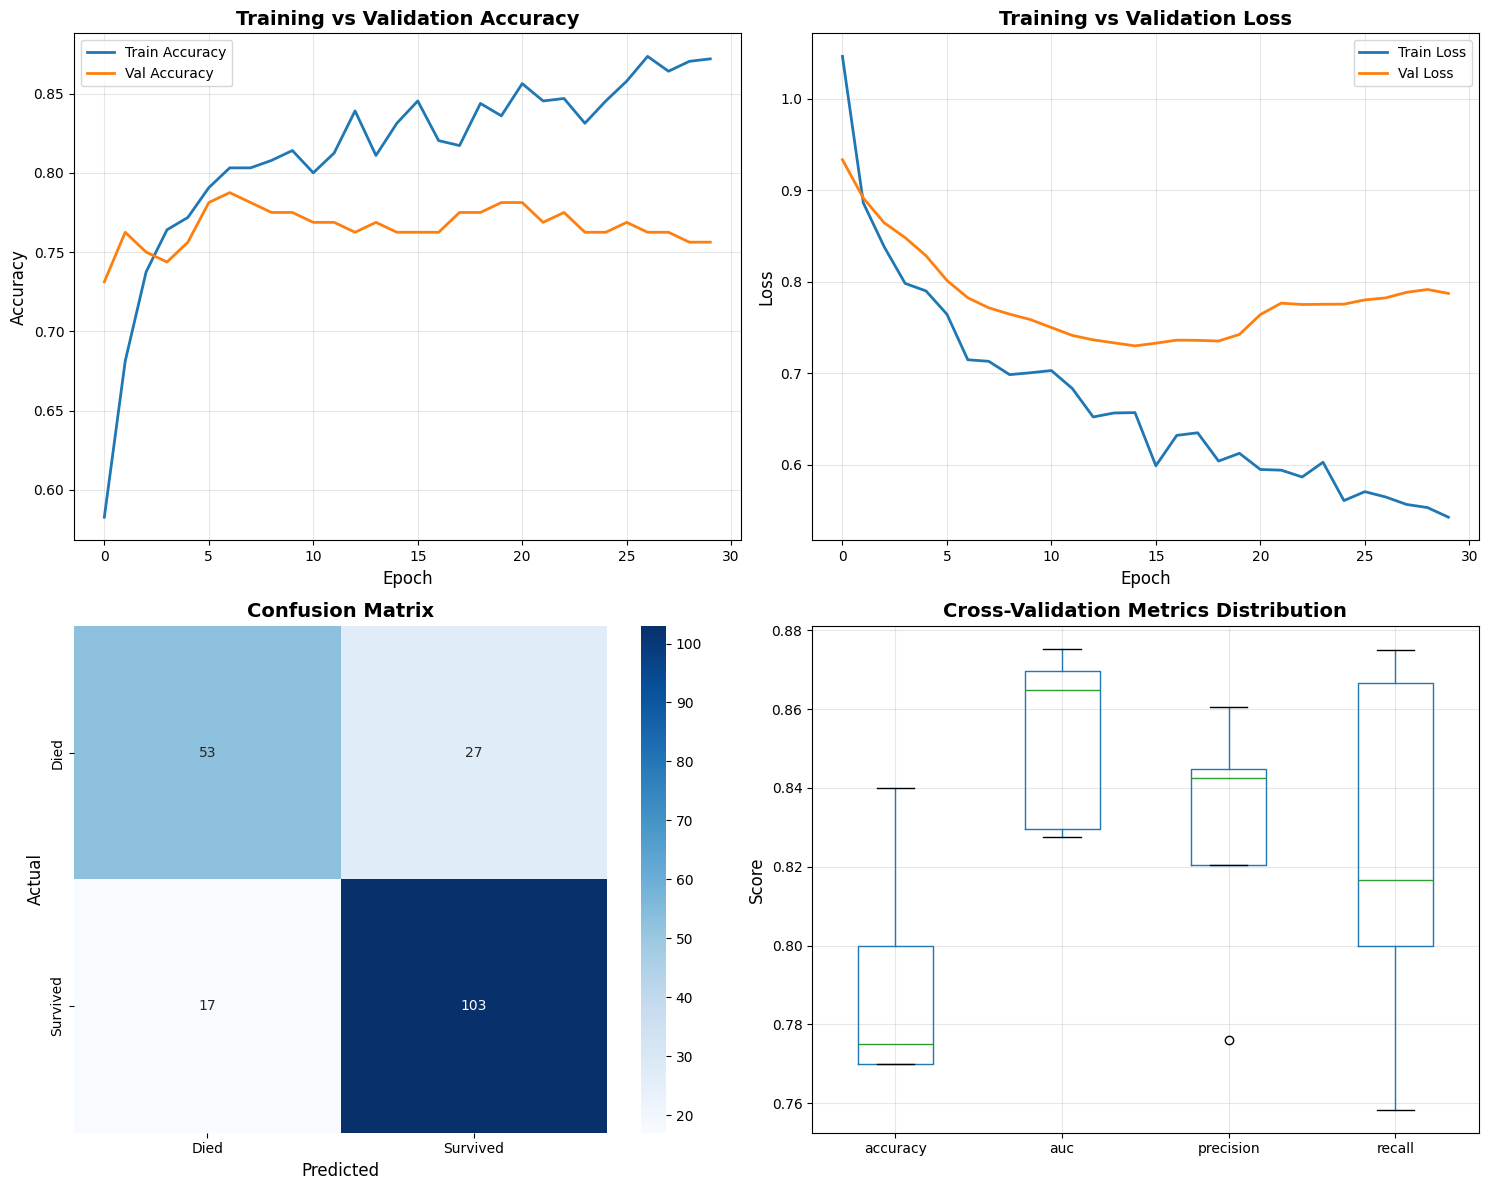


✅ Model training and evaluation complete!

💡 Key Takeaways:
   - CV Accuracy: 79.10% ± 2.69%
   - Test Accuracy: 78.00%
   - ROC-AUC: 0.8521

🎯 Model is ready for deployment on Ujjain, Madhya Pradesh, India!


In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ===========================================
# STEP 2: Load OSM Data for Region
# ===========================================
place = "Ujjain, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

try:
    # Hospitals
    hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})
    hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)

    # Buildings
    buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})
    buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

    # Road network
    roads = ox.graph_from_place(place, network_type="drive", simplify=True)
    roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)

    print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")
except Exception as e:
    print(f"⚠️ Error loading OSM data: {e}")
    # Fallback: create dummy data
    hospitals_gdf = gpd.GeoDataFrame()
    buildings_gdf = gpd.GeoDataFrame()
    roads_gdf = gpd.GeoDataFrame()

# ===========================================
# STEP 3: Create Base Demographic Data (WITHOUT survival labels yet)
# ===========================================
num_samples = 1000  # Increased for better training

print(f"\n📊 Generating {num_samples} synthetic data points...")

data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples, p=[0.5, 0.3, 0.2]),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples, p=[0.4, 0.2, 0.4]),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Education_Level': np.random.choice(['None', 'Primary', 'Secondary', 'Higher'], num_samples),
    'Has_Insurance': np.random.choice([0, 1], num_samples, p=[0.7, 0.3])
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Spatial Features
# ===========================================
print("⚙️ Computing spatial features...")

# Convert to metric CRS for distance calculations
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return 5000  # Default 5km if no data
    return gdf_target.distance(point).min()

# Distance to nearest hospital
if len(hospitals_gdf) > 0:
    hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
else:
    gdf['Distance_to_Hospital'] = np.random.uniform(500, 10000, num_samples)

# Distance to nearest road
if len(roads_gdf) > 0:
    roads_gdf = roads_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Road'] = gdf['geometry'].apply(lambda x: nearest_distance(x, roads_gdf))
else:
    gdf['Distance_to_Road'] = np.random.uniform(50, 2000, num_samples)

# Fill any NaN values
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())
gdf['Distance_to_Road'] = gdf['Distance_to_Road'].fillna(gdf['Distance_to_Road'].median())

print(f"✅ Spatial features computed")

# ===========================================
# STEP 5: Generate REALISTIC Survival Labels
# ===========================================
print("🎯 Generating realistic survival labels based on risk factors...")

# Factor 1: Building Strength (higher = better survival)
building_strength = gdf['Building_Type'].map({
    'Concrete': 4.0,
    'Mixed': 2.5,
    'Wooden': 1.0
})

# Factor 2: Disaster Impact (by type and intensity)
disaster_impact = np.zeros(len(gdf))
for i, row in gdf.iterrows():
    if row['Disaster_Type'] == 'Flood':
        # Floods: building type matters more, lower areas worse
        disaster_impact[i] = row['Disaster_Intensity'] * 1.2
    elif row['Disaster_Type'] == 'Cyclone':
        # Cyclones: wooden buildings very vulnerable
        disaster_impact[i] = row['Disaster_Intensity'] * (1.5 if row['Building_Type'] == 'Wooden' else 1.0)
    else:  # Earthquake
        # Earthquakes: all building types vulnerable at high intensity
        disaster_impact[i] = row['Disaster_Intensity'] * 1.3

# Factor 3: Age vulnerability (children and elderly more vulnerable)
age_vulnerability = gdf['Age'].apply(lambda x:
    2.0 if (x < 10 or x > 70) else  # Very vulnerable
    1.2 if (x < 18 or x > 60) else  # Moderately vulnerable
    1.0  # Prime age, least vulnerable
)

# Factor 4: Access to healthcare (closer hospital = better survival)
hospital_accessibility = 1 / (1 + gdf['Distance_to_Hospital'] / 1000)  # Normalize by km

# Factor 5: Evacuation capability (closer to road = easier evacuation)
evacuation_capability = 1 / (1 + gdf['Distance_to_Road'] / 100)  # Normalize by 100m

# Factor 6: Socioeconomic factors
economic_resilience = (
    (gdf['GDP_per_capita'] / 12000) * 0.5 +  # Wealth helps
    gdf['Has_Insurance'] * 0.3 +  # Insurance helps
    gdf['Education_Level'].map({'None': 0, 'Primary': 0.3, 'Secondary': 0.7, 'Higher': 1.0}) * 0.2
)

# Combine all factors into survival score
survival_score = (
    building_strength * 0.25 +
    (10 - disaster_impact) * 0.30 +  # Invert disaster impact
    (2.5 - age_vulnerability) * 0.15 +
    hospital_accessibility * 2.0 * 0.15 +
    evacuation_capability * 2.0 * 0.10 +
    economic_resilience * 0.05 +
    np.random.normal(0, 0.8, len(gdf))  # Add realistic noise
)

# Normalize to 0-1 range
survival_prob = (survival_score - survival_score.min()) / (survival_score.max() - survival_score.min())

# Convert to binary with some threshold adjustment for balance
threshold = np.percentile(survival_prob, 40)  # Adjust to get ~60% survival rate
gdf['Survived'] = (survival_prob > threshold).astype(int)

print(f"✅ Survival distribution: {gdf['Survived'].value_counts().to_dict()}")
print(f"   Survival rate: {gdf['Survived'].mean()*100:.1f}%")

# ===========================================
# STEP 6: Feature Engineering
# ===========================================
print("\n🔧 Feature engineering...")

# Create interaction features
gdf['Risk_Score'] = gdf['Disaster_Intensity'] * age_vulnerability
gdf['Building_Disaster_Interaction'] = building_strength * disaster_impact

# Drop geometry for modeling
gdf_model = gdf.drop(columns=['geometry'])

# ===========================================
# STEP 7: Preprocessing Pipeline
# ===========================================
X = gdf_model.drop(columns=['Survived'])
y = gdf_model['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender', 'Education_Level']
numerical = [col for col in X.columns if col not in categorical]

print(f"📊 Features: {len(numerical)} numerical, {len(categorical)} categorical")

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
], remainder='drop')

# ===========================================
# STEP 8: Build Improved Deep Learning Model
# ===========================================
def build_model(input_dim):
    model = tf.keras.Sequential([
        # Input layer with regularization
        tf.keras.layers.Dense(256, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001),
                             input_shape=(input_dim,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        # Hidden layers
        tf.keras.layers.Dense(128, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(64, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    return model

# ===========================================
# STEP 9: Train with Cross-Validation
# ===========================================
print("\n🚀 Training with 5-Fold Cross-Validation...")

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {'accuracy': [], 'auc': [], 'precision': [], 'recall': []}
fold_models = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\n{'='*50}")
    print(f"📊 Fold {fold + 1}/5")
    print(f"{'='*50}")

    # Split data
    X_train_fold = preprocessor.fit_transform(X.iloc[train_idx])
    X_val_fold = preprocessor.transform(X.iloc[val_idx])
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Compute class weights
    class_weights = compute_class_weight('balanced',
                                        classes=np.unique(y_train_fold),
                                        y=y_train_fold)
    class_weight_dict = dict(enumerate(class_weights))

    # Build and train model
    model = build_model(X_train_fold.shape[1])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=0
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-6,
            verbose=0
        )
    ]

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=0
    )

    # Evaluate
    metrics = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores['accuracy'].append(metrics[1])
    cv_scores['auc'].append(metrics[2])
    cv_scores['precision'].append(metrics[3])
    cv_scores['recall'].append(metrics[4])

    print(f"✅ Accuracy: {metrics[1]:.4f} | AUC: {metrics[2]:.4f} | "
          f"Precision: {metrics[3]:.4f} | Recall: {metrics[4]:.4f}")

    fold_models.append(model)

# Print CV results
print(f"\n{'='*50}")
print("📈 CROSS-VALIDATION RESULTS")
print(f"{'='*50}")
for metric, scores in cv_scores.items():
    print(f"{metric.capitalize():12s}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# ===========================================
# STEP 10: Final Model Training on Full Data
# ===========================================
print(f"\n{'='*50}")
print("🎯 Training Final Model on 80/20 Split")
print(f"{'='*50}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build final model
final_model = build_model(X_train_proc.shape[1])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )
]

history = final_model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# ===========================================
# STEP 11: Comprehensive Evaluation
# ===========================================
print(f"\n{'='*50}")
print("📊 FINAL MODEL EVALUATION")
print(f"{'='*50}")

y_pred_prob = final_model.predict(X_test_proc)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
print(cm)

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n🎯 ROC-AUC Score: {auc:.4f}")

# ===========================================
# STEP 12: Visualizations
# ===========================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Training history
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. Loss history
axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Loss', fontsize=12)
axes[0, 1].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
axes[1, 0].set_xlabel('Predicted', fontsize=12)
axes[1, 0].set_ylabel('Actual', fontsize=12)
axes[1, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# 4. Cross-validation metrics
metrics_df = pd.DataFrame(cv_scores)
metrics_df.boxplot(ax=axes[1, 1])
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Cross-Validation Metrics Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Model training and evaluation complete!")
print(f"\n💡 Key Takeaways:")
print(f"   - CV Accuracy: {np.mean(cv_scores['accuracy']):.2%} ± {np.std(cv_scores['accuracy']):.2%}")
print(f"   - Test Accuracy: {(y_pred.flatten() == y_test.values).mean():.2%}")
print(f"   - ROC-AUC: {auc:.4f}")
print(f"\n🎯 Model is ready for deployment on {place}!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 6.2 MB/s eta 0:00:00
⏳ Fetching OSM features for: Gwalior, Madhya Pradesh, India
✅ Loaded: 95 hospitals, 472 buildings, 102915 road segments

📊 Generating 1000 synthetic data points...
⚙️ Computing spatial features...
✅ Spatial features computed
🎯 Generating realistic survival labels based on risk factors...
✅ Survival distribution: {1: 600, 0: 400}
   Survival rate: 60.0%

🔧 Feature engineering...
📊 Features: 11 numerical, 4 categorical

🚀 Training with 5-Fold Cross-Validation...

📊 Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7700 | AUC: 0.8848 | Precision: 0.8776 | Recall: 0.7167

📊 Fold 2/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.8350 | AUC: 0.8810 | Precision: 0.8718 | Recall: 0.8500

📊 Fold 3/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7800 | AUC: 0.8440 | Precision: 0.8276 | Recall: 0.8000

📊 Fold 4/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7400 | AUC: 0.8420 | Precision: 0.8469 | Recall: 0.6917

📊 Fold 5/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7900 | AUC: 0.8398 | Precision: 0.8250 | Recall: 0.8250

📈 CROSS-VALIDATION RESULTS
Accuracy    : 0.7830 ± 0.0309
Auc         : 0.8583 ± 0.0202
Precision   : 0.8498 ± 0.0218
Recall      : 0.7767 ± 0.0618

🎯 Training Final Model on 80/20 Split
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.5948 - auc: 0.6318 - loss: 1.0157 - precision: 0.6773 - recall: 0.6269 - val_accuracy: 0.7312 - val_auc: 0.8261 - val_loss: 0.9312 - val_precision: 0.8354 - val_recall: 0.6875 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7363 - auc: 0.8354 - loss: 0.7940 - precision: 0.8346 - recall: 0.7021 - val_accuracy: 0.7312 - val_auc: 0.8496 - val_loss: 0.9145 - val_precision: 0.8118 - val_recall: 0.7188 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7558 - auc: 0.8329 - loss: 0.7998 - precision: 0.8487 - recall: 0.7245 - val_accuracy: 0.7625 - val_auc: 0.8459 - val_loss: 0.9004 - val_precision: 0.8295 - val_recall: 0.7604 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7681 - auc: 0.8589 - loss: 0.7560 - precision: 0.8532 - recall: 0.7434 - val_accuracy: 0.7875 - val_auc: 0.8490 - val_loss: 0.8855 - val_precision: 0.8

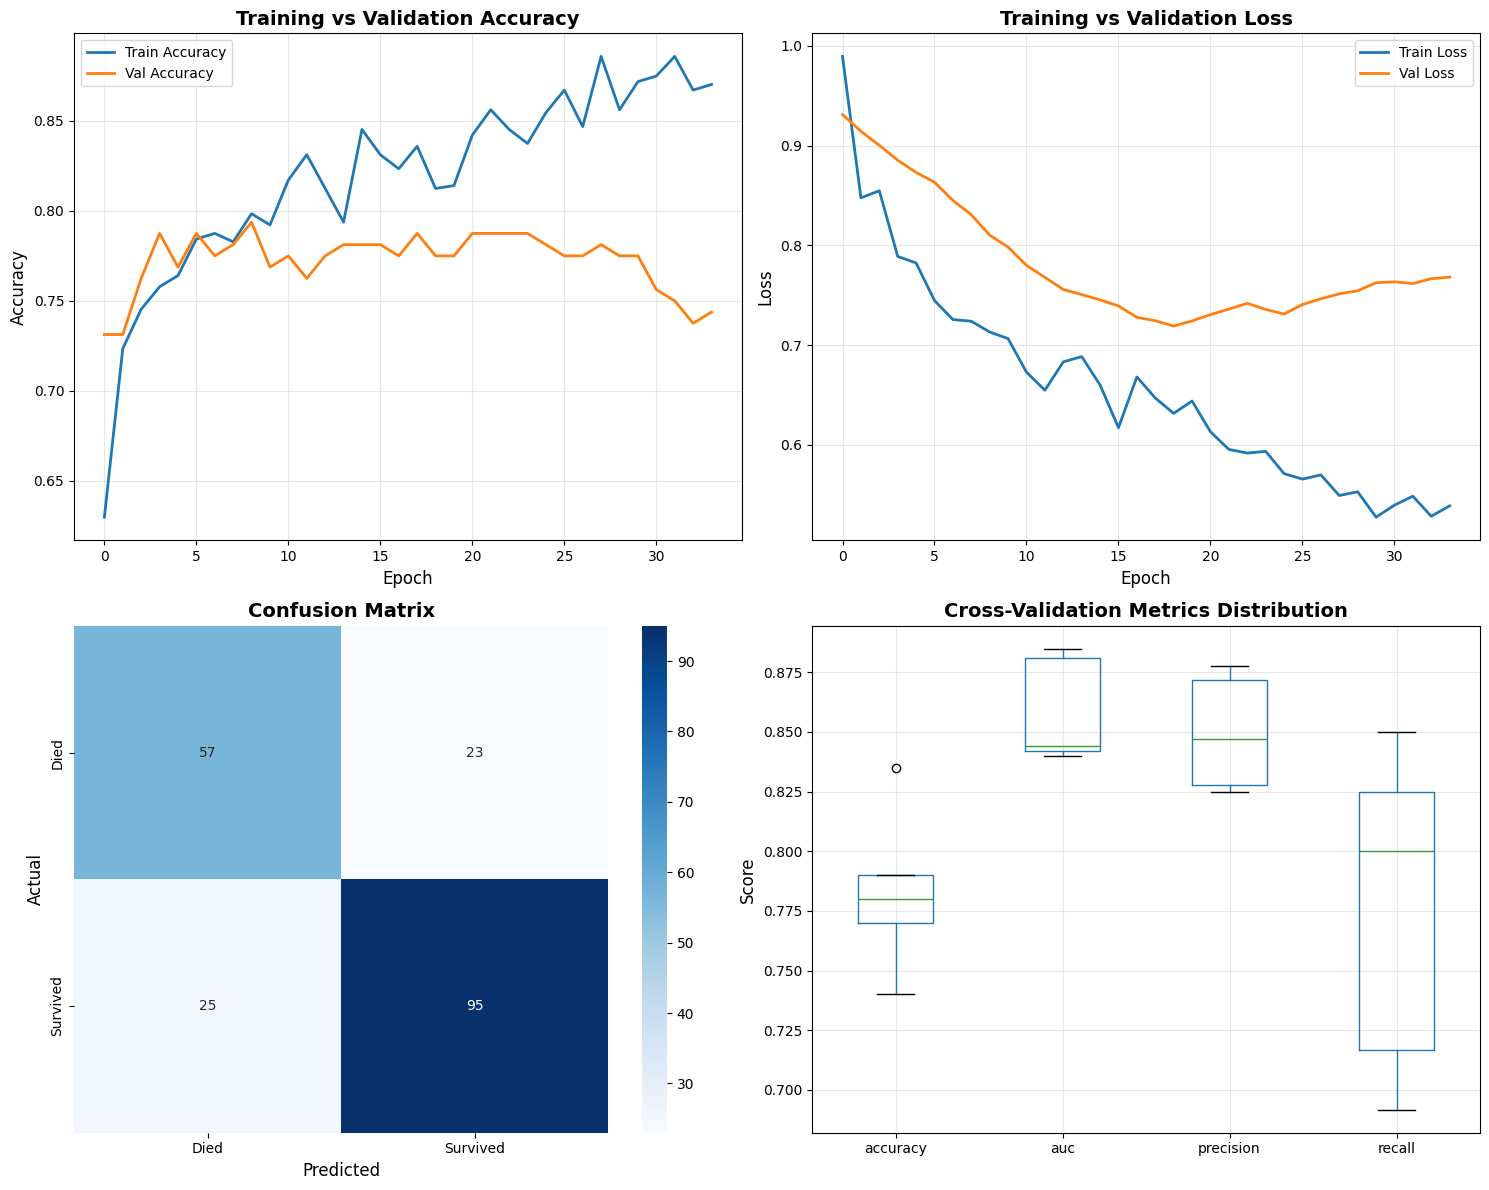


✅ Model training and evaluation complete!

💡 Key Takeaways:
   - CV Accuracy: 78.30% ± 3.09%
   - Test Accuracy: 76.00%
   - ROC-AUC: 0.8424

🎯 Model is ready for deployment on Gwalior, Madhya Pradesh, India!


In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ===========================================
# STEP 2: Load OSM Data for Region
# ===========================================
place = "Gwalior, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

try:
    # Hospitals
    hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})
    hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)

    # Buildings
    buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})
    buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

    # Road network
    roads = ox.graph_from_place(place, network_type="drive", simplify=True)
    roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)

    print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")
except Exception as e:
    print(f"⚠️ Error loading OSM data: {e}")
    # Fallback: create dummy data
    hospitals_gdf = gpd.GeoDataFrame()
    buildings_gdf = gpd.GeoDataFrame()
    roads_gdf = gpd.GeoDataFrame()

# ===========================================
# STEP 3: Create Base Demographic Data (WITHOUT survival labels yet)
# ===========================================
num_samples = 1000  # Increased for better training

print(f"\n📊 Generating {num_samples} synthetic data points...")

data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples, p=[0.5, 0.3, 0.2]),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples, p=[0.4, 0.2, 0.4]),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Education_Level': np.random.choice(['None', 'Primary', 'Secondary', 'Higher'], num_samples),
    'Has_Insurance': np.random.choice([0, 1], num_samples, p=[0.7, 0.3])
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Spatial Features
# ===========================================
print("⚙️ Computing spatial features...")

# Convert to metric CRS for distance calculations
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return 5000  # Default 5km if no data
    return gdf_target.distance(point).min()

# Distance to nearest hospital
if len(hospitals_gdf) > 0:
    hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
else:
    gdf['Distance_to_Hospital'] = np.random.uniform(500, 10000, num_samples)

# Distance to nearest road
if len(roads_gdf) > 0:
    roads_gdf = roads_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Road'] = gdf['geometry'].apply(lambda x: nearest_distance(x, roads_gdf))
else:
    gdf['Distance_to_Road'] = np.random.uniform(50, 2000, num_samples)

# Fill any NaN values
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())
gdf['Distance_to_Road'] = gdf['Distance_to_Road'].fillna(gdf['Distance_to_Road'].median())

print(f"✅ Spatial features computed")

# ===========================================
# STEP 5: Generate REALISTIC Survival Labels
# ===========================================
print("🎯 Generating realistic survival labels based on risk factors...")

# Factor 1: Building Strength (higher = better survival)
building_strength = gdf['Building_Type'].map({
    'Concrete': 4.0,
    'Mixed': 2.5,
    'Wooden': 1.0
})

# Factor 2: Disaster Impact (by type and intensity)
disaster_impact = np.zeros(len(gdf))
for i, row in gdf.iterrows():
    if row['Disaster_Type'] == 'Flood':
        # Floods: building type matters more, lower areas worse
        disaster_impact[i] = row['Disaster_Intensity'] * 1.2
    elif row['Disaster_Type'] == 'Cyclone':
        # Cyclones: wooden buildings very vulnerable
        disaster_impact[i] = row['Disaster_Intensity'] * (1.5 if row['Building_Type'] == 'Wooden' else 1.0)
    else:  # Earthquake
        # Earthquakes: all building types vulnerable at high intensity
        disaster_impact[i] = row['Disaster_Intensity'] * 1.3

# Factor 3: Age vulnerability (children and elderly more vulnerable)
age_vulnerability = gdf['Age'].apply(lambda x:
    2.0 if (x < 10 or x > 70) else  # Very vulnerable
    1.2 if (x < 18 or x > 60) else  # Moderately vulnerable
    1.0  # Prime age, least vulnerable
)

# Factor 4: Access to healthcare (closer hospital = better survival)
hospital_accessibility = 1 / (1 + gdf['Distance_to_Hospital'] / 1000)  # Normalize by km

# Factor 5: Evacuation capability (closer to road = easier evacuation)
evacuation_capability = 1 / (1 + gdf['Distance_to_Road'] / 100)  # Normalize by 100m

# Factor 6: Socioeconomic factors
economic_resilience = (
    (gdf['GDP_per_capita'] / 12000) * 0.5 +  # Wealth helps
    gdf['Has_Insurance'] * 0.3 +  # Insurance helps
    gdf['Education_Level'].map({'None': 0, 'Primary': 0.3, 'Secondary': 0.7, 'Higher': 1.0}) * 0.2
)

# Combine all factors into survival score
survival_score = (
    building_strength * 0.25 +
    (10 - disaster_impact) * 0.30 +  # Invert disaster impact
    (2.5 - age_vulnerability) * 0.15 +
    hospital_accessibility * 2.0 * 0.15 +
    evacuation_capability * 2.0 * 0.10 +
    economic_resilience * 0.05 +
    np.random.normal(0, 0.8, len(gdf))  # Add realistic noise
)

# Normalize to 0-1 range
survival_prob = (survival_score - survival_score.min()) / (survival_score.max() - survival_score.min())

# Convert to binary with some threshold adjustment for balance
threshold = np.percentile(survival_prob, 40)  # Adjust to get ~60% survival rate
gdf['Survived'] = (survival_prob > threshold).astype(int)

print(f"✅ Survival distribution: {gdf['Survived'].value_counts().to_dict()}")
print(f"   Survival rate: {gdf['Survived'].mean()*100:.1f}%")

# ===========================================
# STEP 6: Feature Engineering
# ===========================================
print("\n🔧 Feature engineering...")

# Create interaction features
gdf['Risk_Score'] = gdf['Disaster_Intensity'] * age_vulnerability
gdf['Building_Disaster_Interaction'] = building_strength * disaster_impact

# Drop geometry for modeling
gdf_model = gdf.drop(columns=['geometry'])

# ===========================================
# STEP 7: Preprocessing Pipeline
# ===========================================
X = gdf_model.drop(columns=['Survived'])
y = gdf_model['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender', 'Education_Level']
numerical = [col for col in X.columns if col not in categorical]

print(f"📊 Features: {len(numerical)} numerical, {len(categorical)} categorical")

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
], remainder='drop')

# ===========================================
# STEP 8: Build Improved Deep Learning Model
# ===========================================
def build_model(input_dim):
    model = tf.keras.Sequential([
        # Input layer with regularization
        tf.keras.layers.Dense(256, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001),
                             input_shape=(input_dim,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        # Hidden layers
        tf.keras.layers.Dense(128, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(64, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    return model

# ===========================================
# STEP 9: Train with Cross-Validation
# ===========================================
print("\n🚀 Training with 5-Fold Cross-Validation...")

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {'accuracy': [], 'auc': [], 'precision': [], 'recall': []}
fold_models = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\n{'='*50}")
    print(f"📊 Fold {fold + 1}/5")
    print(f"{'='*50}")

    # Split data
    X_train_fold = preprocessor.fit_transform(X.iloc[train_idx])
    X_val_fold = preprocessor.transform(X.iloc[val_idx])
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Compute class weights
    class_weights = compute_class_weight('balanced',
                                        classes=np.unique(y_train_fold),
                                        y=y_train_fold)
    class_weight_dict = dict(enumerate(class_weights))

    # Build and train model
    model = build_model(X_train_fold.shape[1])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=0
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-6,
            verbose=0
        )
    ]

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=0
    )

    # Evaluate
    metrics = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores['accuracy'].append(metrics[1])
    cv_scores['auc'].append(metrics[2])
    cv_scores['precision'].append(metrics[3])
    cv_scores['recall'].append(metrics[4])

    print(f"✅ Accuracy: {metrics[1]:.4f} | AUC: {metrics[2]:.4f} | "
          f"Precision: {metrics[3]:.4f} | Recall: {metrics[4]:.4f}")

    fold_models.append(model)

# Print CV results
print(f"\n{'='*50}")
print("📈 CROSS-VALIDATION RESULTS")
print(f"{'='*50}")
for metric, scores in cv_scores.items():
    print(f"{metric.capitalize():12s}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# ===========================================
# STEP 10: Final Model Training on Full Data
# ===========================================
print(f"\n{'='*50}")
print("🎯 Training Final Model on 80/20 Split")
print(f"{'='*50}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build final model
final_model = build_model(X_train_proc.shape[1])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )
]

history = final_model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# ===========================================
# STEP 11: Comprehensive Evaluation
# ===========================================
print(f"\n{'='*50}")
print("📊 FINAL MODEL EVALUATION")
print(f"{'='*50}")

y_pred_prob = final_model.predict(X_test_proc)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
print(cm)

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n🎯 ROC-AUC Score: {auc:.4f}")

# ===========================================
# STEP 12: Visualizations
# ===========================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Training history
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. Loss history
axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Loss', fontsize=12)
axes[0, 1].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
axes[1, 0].set_xlabel('Predicted', fontsize=12)
axes[1, 0].set_ylabel('Actual', fontsize=12)
axes[1, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# 4. Cross-validation metrics
metrics_df = pd.DataFrame(cv_scores)
metrics_df.boxplot(ax=axes[1, 1])
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Cross-Validation Metrics Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Model training and evaluation complete!")
print(f"\n💡 Key Takeaways:")
print(f"   - CV Accuracy: {np.mean(cv_scores['accuracy']):.2%} ± {np.std(cv_scores['accuracy']):.2%}")
print(f"   - Test Accuracy: {(y_pred.flatten() == y_test.values).mean():.2%}")
print(f"   - ROC-AUC: {auc:.4f}")
print(f"\n🎯 Model is ready for deployment on {place}!")

⏳ Fetching OSM features for: Jabalpur, Madhya Pradesh, India
✅ Loaded: 58 hospitals, 338 buildings, 25320 road segments

📊 Generating 1000 synthetic data points...
⚙️ Computing spatial features...
✅ Spatial features computed
🎯 Generating realistic survival labels based on risk factors...
✅ Survival distribution: {1: 600, 0: 400}
   Survival rate: 60.0%

🔧 Feature engineering...
📊 Features: 11 numerical, 4 categorical

🚀 Training with 5-Fold Cross-Validation...

📊 Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7700 | AUC: 0.8693 | Precision: 0.8558 | Recall: 0.7417

📊 Fold 2/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.8100 | AUC: 0.8781 | Precision: 0.8868 | Recall: 0.7833

📊 Fold 3/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7700 | AUC: 0.8565 | Precision: 0.8426 | Recall: 0.7583

📊 Fold 4/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7400 | AUC: 0.8376 | Precision: 0.7787 | Recall: 0.7917

📊 Fold 5/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7650 | AUC: 0.8355 | Precision: 0.8174 | Recall: 0.7833

📈 CROSS-VALIDATION RESULTS
Accuracy    : 0.7710 ± 0.0224
Auc         : 0.8554 ± 0.0169
Precision   : 0.8362 ± 0.0365
Recall      : 0.7717 ± 0.0187

🎯 Training Final Model on 80/20 Split
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.5387 - auc: 0.5452 - loss: 1.0408 - precision: 0.6317 - recall: 0.5653 - val_accuracy: 0.7250 - val_auc: 0.7895 - val_loss: 0.9633 - val_precision: 0.8421 - val_recall: 0.6667 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7005 - auc: 0.7438 - loss: 0.8945 - precision: 0.7846 - recall: 0.6944 - val_accuracy: 0.7625 - val_auc: 0.8203 - val_loss: 0.9366 - val_precision: 0.8152 - val_recall: 0.7812 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7340 - auc: 0.8054 - loss: 0.8300 - precision: 0.8290 - recall: 0.7038 - val_accuracy: 0.7688 - val_auc: 0.8363 - val_loss: 0.9086 - val_precision: 0.8172 - val_recall: 0.7917 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7695 - auc: 0.8434 - loss: 0.7855 - precision: 0.8369 - recall: 0.7666 - val_accuracy: 0.7812 - val_auc: 0.8443 - val_loss: 0.8811 - val_precision: 0.8

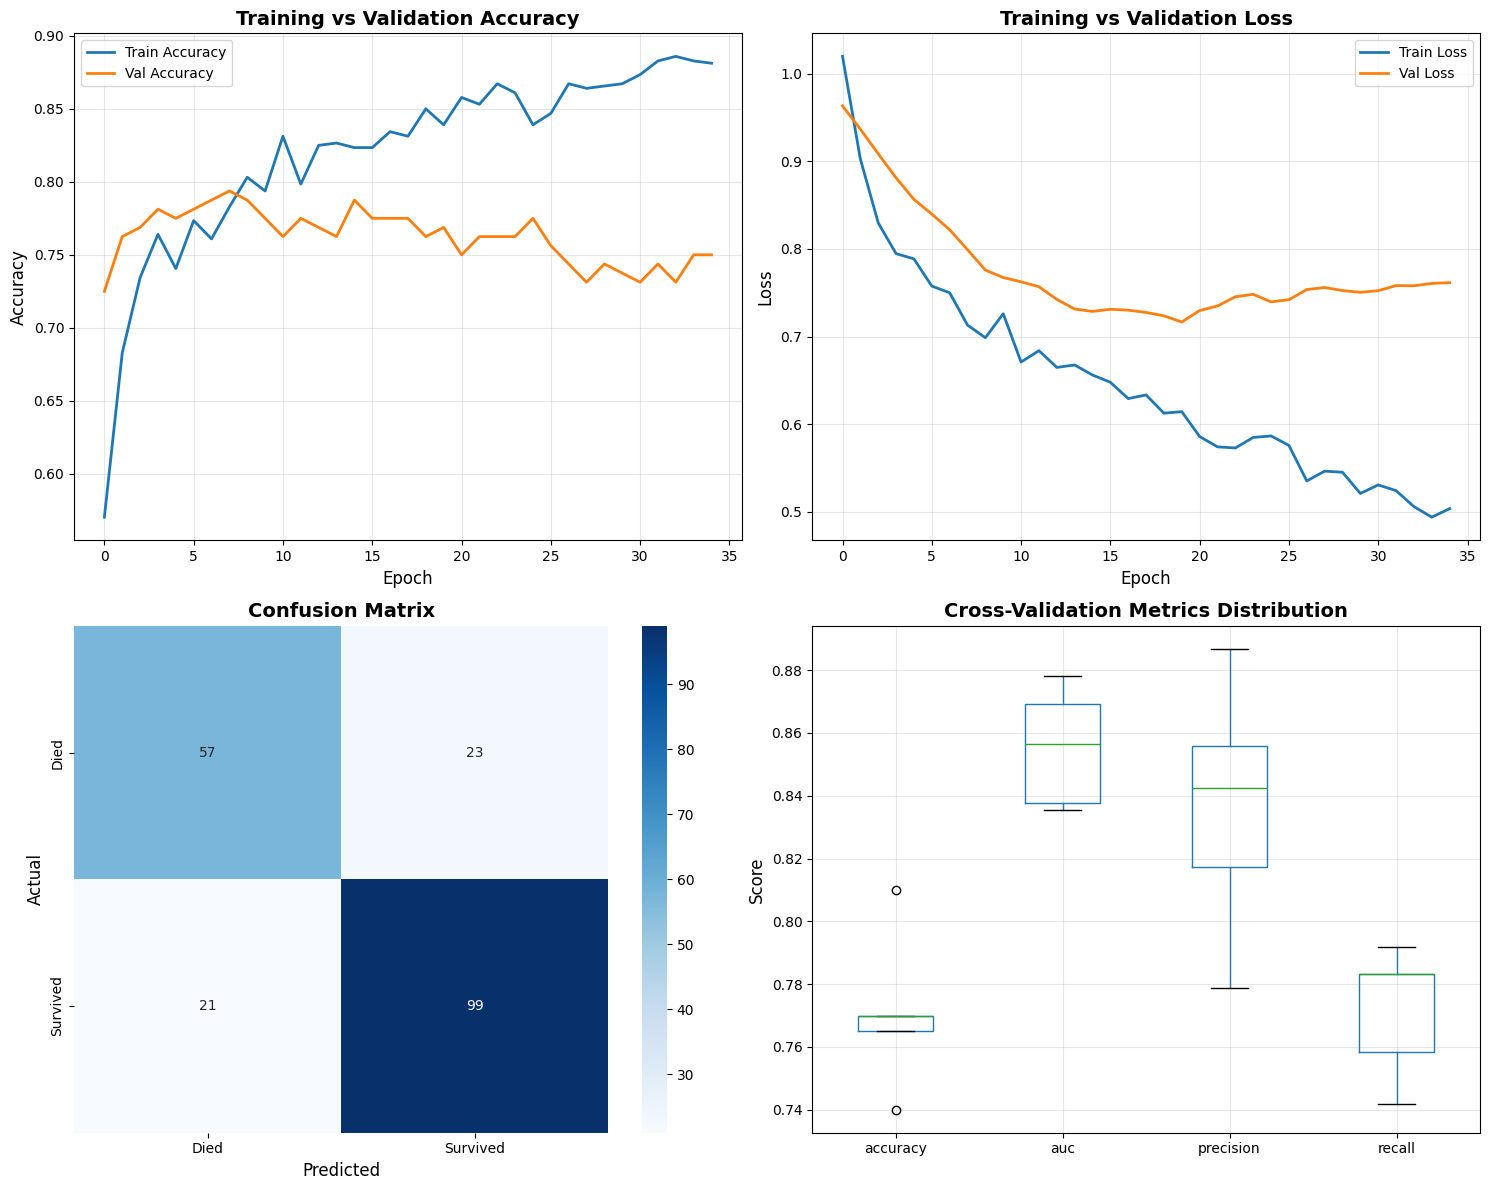


✅ Model training and evaluation complete!

💡 Key Takeaways:
   - CV Accuracy: 77.10% ± 2.24%
   - Test Accuracy: 78.00%
   - ROC-AUC: 0.8532

🎯 Model is ready for deployment on Jabalpur, Madhya Pradesh, India!


In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ===========================================
# STEP 2: Load OSM Data for Region
# ===========================================
place = "Jabalpur, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

try:
    # Hospitals
    hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})
    hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)

    # Buildings
    buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})
    buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

    # Road network
    roads = ox.graph_from_place(place, network_type="drive", simplify=True)
    roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)

    print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")
except Exception as e:
    print(f"⚠️ Error loading OSM data: {e}")
    # Fallback: create dummy data
    hospitals_gdf = gpd.GeoDataFrame()
    buildings_gdf = gpd.GeoDataFrame()
    roads_gdf = gpd.GeoDataFrame()

# ===========================================
# STEP 3: Create Base Demographic Data (WITHOUT survival labels yet)
# ===========================================
num_samples = 1000  # Increased for better training

print(f"\n📊 Generating {num_samples} synthetic data points...")

data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples, p=[0.5, 0.3, 0.2]),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples, p=[0.4, 0.2, 0.4]),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Education_Level': np.random.choice(['None', 'Primary', 'Secondary', 'Higher'], num_samples),
    'Has_Insurance': np.random.choice([0, 1], num_samples, p=[0.7, 0.3])
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Spatial Features
# ===========================================
print("⚙️ Computing spatial features...")

# Convert to metric CRS for distance calculations
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return 5000  # Default 5km if no data
    return gdf_target.distance(point).min()

# Distance to nearest hospital
if len(hospitals_gdf) > 0:
    hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
else:
    gdf['Distance_to_Hospital'] = np.random.uniform(500, 10000, num_samples)

# Distance to nearest road
if len(roads_gdf) > 0:
    roads_gdf = roads_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Road'] = gdf['geometry'].apply(lambda x: nearest_distance(x, roads_gdf))
else:
    gdf['Distance_to_Road'] = np.random.uniform(50, 2000, num_samples)

# Fill any NaN values
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())
gdf['Distance_to_Road'] = gdf['Distance_to_Road'].fillna(gdf['Distance_to_Road'].median())

print(f"✅ Spatial features computed")

# ===========================================
# STEP 5: Generate REALISTIC Survival Labels
# ===========================================
print("🎯 Generating realistic survival labels based on risk factors...")

# Factor 1: Building Strength (higher = better survival)
building_strength = gdf['Building_Type'].map({
    'Concrete': 4.0,
    'Mixed': 2.5,
    'Wooden': 1.0
})

# Factor 2: Disaster Impact (by type and intensity)
disaster_impact = np.zeros(len(gdf))
for i, row in gdf.iterrows():
    if row['Disaster_Type'] == 'Flood':
        # Floods: building type matters more, lower areas worse
        disaster_impact[i] = row['Disaster_Intensity'] * 1.2
    elif row['Disaster_Type'] == 'Cyclone':
        # Cyclones: wooden buildings very vulnerable
        disaster_impact[i] = row['Disaster_Intensity'] * (1.5 if row['Building_Type'] == 'Wooden' else 1.0)
    else:  # Earthquake
        # Earthquakes: all building types vulnerable at high intensity
        disaster_impact[i] = row['Disaster_Intensity'] * 1.3

# Factor 3: Age vulnerability (children and elderly more vulnerable)
age_vulnerability = gdf['Age'].apply(lambda x:
    2.0 if (x < 10 or x > 70) else  # Very vulnerable
    1.2 if (x < 18 or x > 60) else  # Moderately vulnerable
    1.0  # Prime age, least vulnerable
)

# Factor 4: Access to healthcare (closer hospital = better survival)
hospital_accessibility = 1 / (1 + gdf['Distance_to_Hospital'] / 1000)  # Normalize by km

# Factor 5: Evacuation capability (closer to road = easier evacuation)
evacuation_capability = 1 / (1 + gdf['Distance_to_Road'] / 100)  # Normalize by 100m

# Factor 6: Socioeconomic factors
economic_resilience = (
    (gdf['GDP_per_capita'] / 12000) * 0.5 +  # Wealth helps
    gdf['Has_Insurance'] * 0.3 +  # Insurance helps
    gdf['Education_Level'].map({'None': 0, 'Primary': 0.3, 'Secondary': 0.7, 'Higher': 1.0}) * 0.2
)

# Combine all factors into survival score
survival_score = (
    building_strength * 0.25 +
    (10 - disaster_impact) * 0.30 +  # Invert disaster impact
    (2.5 - age_vulnerability) * 0.15 +
    hospital_accessibility * 2.0 * 0.15 +
    evacuation_capability * 2.0 * 0.10 +
    economic_resilience * 0.05 +
    np.random.normal(0, 0.8, len(gdf))  # Add realistic noise
)

# Normalize to 0-1 range
survival_prob = (survival_score - survival_score.min()) / (survival_score.max() - survival_score.min())

# Convert to binary with some threshold adjustment for balance
threshold = np.percentile(survival_prob, 40)  # Adjust to get ~60% survival rate
gdf['Survived'] = (survival_prob > threshold).astype(int)

print(f"✅ Survival distribution: {gdf['Survived'].value_counts().to_dict()}")
print(f"   Survival rate: {gdf['Survived'].mean()*100:.1f}%")

# ===========================================
# STEP 6: Feature Engineering
# ===========================================
print("\n🔧 Feature engineering...")

# Create interaction features
gdf['Risk_Score'] = gdf['Disaster_Intensity'] * age_vulnerability
gdf['Building_Disaster_Interaction'] = building_strength * disaster_impact

# Drop geometry for modeling
gdf_model = gdf.drop(columns=['geometry'])

# ===========================================
# STEP 7: Preprocessing Pipeline
# ===========================================
X = gdf_model.drop(columns=['Survived'])
y = gdf_model['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender', 'Education_Level']
numerical = [col for col in X.columns if col not in categorical]

print(f"📊 Features: {len(numerical)} numerical, {len(categorical)} categorical")

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
], remainder='drop')

# ===========================================
# STEP 8: Build Improved Deep Learning Model
# ===========================================
def build_model(input_dim):
    model = tf.keras.Sequential([
        # Input layer with regularization
        tf.keras.layers.Dense(256, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001),
                             input_shape=(input_dim,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        # Hidden layers
        tf.keras.layers.Dense(128, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(64, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    return model

# ===========================================
# STEP 9: Train with Cross-Validation
# ===========================================
print("\n🚀 Training with 5-Fold Cross-Validation...")

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {'accuracy': [], 'auc': [], 'precision': [], 'recall': []}
fold_models = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\n{'='*50}")
    print(f"📊 Fold {fold + 1}/5")
    print(f"{'='*50}")

    # Split data
    X_train_fold = preprocessor.fit_transform(X.iloc[train_idx])
    X_val_fold = preprocessor.transform(X.iloc[val_idx])
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Compute class weights
    class_weights = compute_class_weight('balanced',
                                        classes=np.unique(y_train_fold),
                                        y=y_train_fold)
    class_weight_dict = dict(enumerate(class_weights))

    # Build and train model
    model = build_model(X_train_fold.shape[1])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=0
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-6,
            verbose=0
        )
    ]

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=0
    )

    # Evaluate
    metrics = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores['accuracy'].append(metrics[1])
    cv_scores['auc'].append(metrics[2])
    cv_scores['precision'].append(metrics[3])
    cv_scores['recall'].append(metrics[4])

    print(f"✅ Accuracy: {metrics[1]:.4f} | AUC: {metrics[2]:.4f} | "
          f"Precision: {metrics[3]:.4f} | Recall: {metrics[4]:.4f}")

    fold_models.append(model)

# Print CV results
print(f"\n{'='*50}")
print("📈 CROSS-VALIDATION RESULTS")
print(f"{'='*50}")
for metric, scores in cv_scores.items():
    print(f"{metric.capitalize():12s}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# ===========================================
# STEP 10: Final Model Training on Full Data
# ===========================================
print(f"\n{'='*50}")
print("🎯 Training Final Model on 80/20 Split")
print(f"{'='*50}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build final model
final_model = build_model(X_train_proc.shape[1])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )
]

history = final_model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# ===========================================
# STEP 11: Comprehensive Evaluation
# ===========================================
print(f"\n{'='*50}")
print("📊 FINAL MODEL EVALUATION")
print(f"{'='*50}")

y_pred_prob = final_model.predict(X_test_proc)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
print(cm)

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n🎯 ROC-AUC Score: {auc:.4f}")

# ===========================================
# STEP 12: Visualizations
# ===========================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Training history
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. Loss history
axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Loss', fontsize=12)
axes[0, 1].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
axes[1, 0].set_xlabel('Predicted', fontsize=12)
axes[1, 0].set_ylabel('Actual', fontsize=12)
axes[1, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# 4. Cross-validation metrics
metrics_df = pd.DataFrame(cv_scores)
metrics_df.boxplot(ax=axes[1, 1])
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Cross-Validation Metrics Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Model training and evaluation complete!")
print(f"\n💡 Key Takeaways:")
print(f"   - CV Accuracy: {np.mean(cv_scores['accuracy']):.2%} ± {np.std(cv_scores['accuracy']):.2%}")
print(f"   - Test Accuracy: {(y_pred.flatten() == y_test.values).mean():.2%}")
print(f"   - ROC-AUC: {auc:.4f}")
print(f"\n🎯 Model is ready for deployment on {place}!")

⏳ Fetching OSM features for: Indore, Madhya Pradesh, India
✅ Loaded: 380 hospitals, 312051 buildings, 172853 road segments

📊 Generating 1000 synthetic data points...
⚙️ Computing spatial features...
✅ Spatial features computed
🎯 Generating realistic survival labels based on risk factors...
✅ Survival distribution: {1: 600, 0: 400}
   Survival rate: 60.0%

🔧 Feature engineering...
📊 Features: 11 numerical, 4 categorical

🚀 Training with 5-Fold Cross-Validation...

📊 Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7850 | AUC: 0.8668 | Precision: 0.8348 | Recall: 0.8000

📊 Fold 2/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.8250 | AUC: 0.8798 | Precision: 0.8632 | Recall: 0.8417

📊 Fold 3/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7950 | AUC: 0.8579 | Precision: 0.8559 | Recall: 0.7917

📊 Fold 4/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7600 | AUC: 0.8380 | Precision: 0.8158 | Recall: 0.7750

📊 Fold 5/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7700 | AUC: 0.8348 | Precision: 0.7891 | Recall: 0.8417

📈 CROSS-VALIDATION RESULTS
Accuracy    : 0.7870 ± 0.0225
Auc         : 0.8554 ± 0.0171
Precision   : 0.8317 ± 0.0271
Recall      : 0.8100 ± 0.0271

🎯 Training Final Model on 80/20 Split


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.4615 - auc: 0.5625 - loss: 1.2333 - precision: 0.6729 - recall: 0.1998 - val_accuracy: 0.7437 - val_auc: 0.8150 - val_loss: 0.9405 - val_precision: 0.8313 - val_recall: 0.7188 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6405 - auc: 0.7575 - loss: 0.9474 - precision: 0.8678 - recall: 0.4805 - val_accuracy: 0.7375 - val_auc: 0.8216 - val_loss: 0.8961 - val_precision: 0.7328 - val_recall: 0.8854 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7064 - auc: 0.8056 - loss: 0.8543 - precision: 0.8379 - recall: 0.6363 - val_accuracy: 0.7500 - val_auc: 0.8241 - val_loss: 0.8725 - val_precision: 0.7222 - val_recall: 0.9479 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7460 - auc: 0.8365 - loss: 0.8158 - precision: 0.8471 - recall: 0.7066 - val_accuracy: 0.7375 - val_auc: 0.8271 - val_loss: 0.8548 - val_pr

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        80
           1       0.79      0.83      0.81       120

    accuracy                           0.77       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.77      0.76       200


📊 Confusion Matrix:
[[ 53  27]
 [ 20 100]]

🎯 ROC-AUC Score: 0.8549


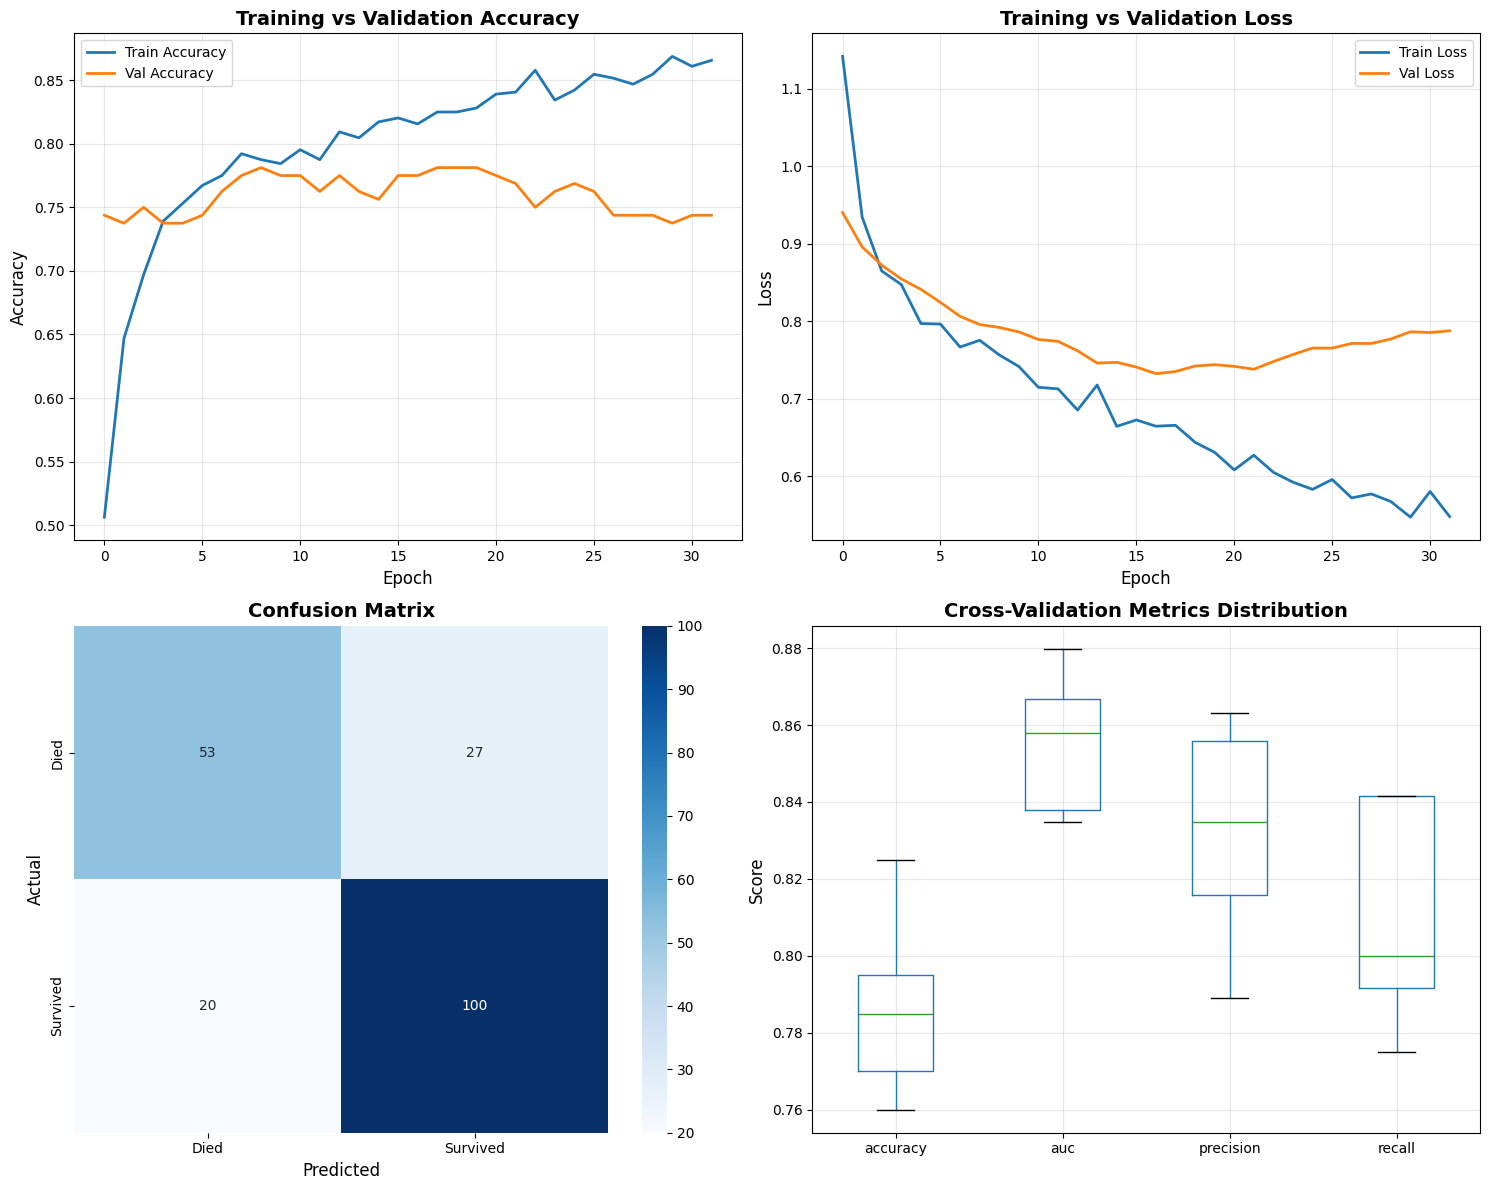


✅ Model training and evaluation complete!

💡 Key Takeaways:
   - CV Accuracy: 78.70% ± 2.25%
   - Test Accuracy: 76.50%
   - ROC-AUC: 0.8549

🎯 Model is ready for deployment on Indore, Madhya Pradesh, India!


In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ===========================================
# STEP 2: Load OSM Data for Region
# ===========================================
place = "Indore, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

try:
    # Hospitals
    hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})
    hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)

    # Buildings
    buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})
    buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

    # Road network
    roads = ox.graph_from_place(place, network_type="drive", simplify=True)
    roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)

    print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")
except Exception as e:
    print(f"⚠️ Error loading OSM data: {e}")
    # Fallback: create dummy data
    hospitals_gdf = gpd.GeoDataFrame()
    buildings_gdf = gpd.GeoDataFrame()
    roads_gdf = gpd.GeoDataFrame()

# ===========================================
# STEP 3: Create Base Demographic Data (WITHOUT survival labels yet)
# ===========================================
num_samples = 1000  # Increased for better training

print(f"\n📊 Generating {num_samples} synthetic data points...")

data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples, p=[0.5, 0.3, 0.2]),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples, p=[0.4, 0.2, 0.4]),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Education_Level': np.random.choice(['None', 'Primary', 'Secondary', 'Higher'], num_samples),
    'Has_Insurance': np.random.choice([0, 1], num_samples, p=[0.7, 0.3])
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Spatial Features
# ===========================================
print("⚙️ Computing spatial features...")

# Convert to metric CRS for distance calculations
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return 5000  # Default 5km if no data
    return gdf_target.distance(point).min()

# Distance to nearest hospital
if len(hospitals_gdf) > 0:
    hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
else:
    gdf['Distance_to_Hospital'] = np.random.uniform(500, 10000, num_samples)

# Distance to nearest road
if len(roads_gdf) > 0:
    roads_gdf = roads_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Road'] = gdf['geometry'].apply(lambda x: nearest_distance(x, roads_gdf))
else:
    gdf['Distance_to_Road'] = np.random.uniform(50, 2000, num_samples)

# Fill any NaN values
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())
gdf['Distance_to_Road'] = gdf['Distance_to_Road'].fillna(gdf['Distance_to_Road'].median())

print(f"✅ Spatial features computed")

# ===========================================
# STEP 5: Generate REALISTIC Survival Labels
# ===========================================
print("🎯 Generating realistic survival labels based on risk factors...")

# Factor 1: Building Strength (higher = better survival)
building_strength = gdf['Building_Type'].map({
    'Concrete': 4.0,
    'Mixed': 2.5,
    'Wooden': 1.0
})

# Factor 2: Disaster Impact (by type and intensity)
disaster_impact = np.zeros(len(gdf))
for i, row in gdf.iterrows():
    if row['Disaster_Type'] == 'Flood':
        # Floods: building type matters more, lower areas worse
        disaster_impact[i] = row['Disaster_Intensity'] * 1.2
    elif row['Disaster_Type'] == 'Cyclone':
        # Cyclones: wooden buildings very vulnerable
        disaster_impact[i] = row['Disaster_Intensity'] * (1.5 if row['Building_Type'] == 'Wooden' else 1.0)
    else:  # Earthquake
        # Earthquakes: all building types vulnerable at high intensity
        disaster_impact[i] = row['Disaster_Intensity'] * 1.3

# Factor 3: Age vulnerability (children and elderly more vulnerable)
age_vulnerability = gdf['Age'].apply(lambda x:
    2.0 if (x < 10 or x > 70) else  # Very vulnerable
    1.2 if (x < 18 or x > 60) else  # Moderately vulnerable
    1.0  # Prime age, least vulnerable
)

# Factor 4: Access to healthcare (closer hospital = better survival)
hospital_accessibility = 1 / (1 + gdf['Distance_to_Hospital'] / 1000)  # Normalize by km

# Factor 5: Evacuation capability (closer to road = easier evacuation)
evacuation_capability = 1 / (1 + gdf['Distance_to_Road'] / 100)  # Normalize by 100m

# Factor 6: Socioeconomic factors
economic_resilience = (
    (gdf['GDP_per_capita'] / 12000) * 0.5 +  # Wealth helps
    gdf['Has_Insurance'] * 0.3 +  # Insurance helps
    gdf['Education_Level'].map({'None': 0, 'Primary': 0.3, 'Secondary': 0.7, 'Higher': 1.0}) * 0.2
)

# Combine all factors into survival score
survival_score = (
    building_strength * 0.25 +
    (10 - disaster_impact) * 0.30 +  # Invert disaster impact
    (2.5 - age_vulnerability) * 0.15 +
    hospital_accessibility * 2.0 * 0.15 +
    evacuation_capability * 2.0 * 0.10 +
    economic_resilience * 0.05 +
    np.random.normal(0, 0.8, len(gdf))  # Add realistic noise
)

# Normalize to 0-1 range
survival_prob = (survival_score - survival_score.min()) / (survival_score.max() - survival_score.min())

# Convert to binary with some threshold adjustment for balance
threshold = np.percentile(survival_prob, 40)  # Adjust to get ~60% survival rate
gdf['Survived'] = (survival_prob > threshold).astype(int)

print(f"✅ Survival distribution: {gdf['Survived'].value_counts().to_dict()}")
print(f"   Survival rate: {gdf['Survived'].mean()*100:.1f}%")

# ===========================================
# STEP 6: Feature Engineering
# ===========================================
print("\n🔧 Feature engineering...")

# Create interaction features
gdf['Risk_Score'] = gdf['Disaster_Intensity'] * age_vulnerability
gdf['Building_Disaster_Interaction'] = building_strength * disaster_impact

# Drop geometry for modeling
gdf_model = gdf.drop(columns=['geometry'])

# ===========================================
# STEP 7: Preprocessing Pipeline
# ===========================================
X = gdf_model.drop(columns=['Survived'])
y = gdf_model['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender', 'Education_Level']
numerical = [col for col in X.columns if col not in categorical]

print(f"📊 Features: {len(numerical)} numerical, {len(categorical)} categorical")

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
], remainder='drop')

# ===========================================
# STEP 8: Build Improved Deep Learning Model
# ===========================================
def build_model(input_dim):
    model = tf.keras.Sequential([
        # Input layer with regularization
        tf.keras.layers.Dense(256, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001),
                             input_shape=(input_dim,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        # Hidden layers
        tf.keras.layers.Dense(128, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(64, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    return model

# ===========================================
# STEP 9: Train with Cross-Validation
# ===========================================
print("\n🚀 Training with 5-Fold Cross-Validation...")

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {'accuracy': [], 'auc': [], 'precision': [], 'recall': []}
fold_models = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\n{'='*50}")
    print(f"📊 Fold {fold + 1}/5")
    print(f"{'='*50}")

    # Split data
    X_train_fold = preprocessor.fit_transform(X.iloc[train_idx])
    X_val_fold = preprocessor.transform(X.iloc[val_idx])
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Compute class weights
    class_weights = compute_class_weight('balanced',
                                        classes=np.unique(y_train_fold),
                                        y=y_train_fold)
    class_weight_dict = dict(enumerate(class_weights))

    # Build and train model
    model = build_model(X_train_fold.shape[1])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=0
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-6,
            verbose=0
        )
    ]

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=0
    )

    # Evaluate
    metrics = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores['accuracy'].append(metrics[1])
    cv_scores['auc'].append(metrics[2])
    cv_scores['precision'].append(metrics[3])
    cv_scores['recall'].append(metrics[4])

    print(f"✅ Accuracy: {metrics[1]:.4f} | AUC: {metrics[2]:.4f} | "
          f"Precision: {metrics[3]:.4f} | Recall: {metrics[4]:.4f}")

    fold_models.append(model)

# Print CV results
print(f"\n{'='*50}")
print("📈 CROSS-VALIDATION RESULTS")
print(f"{'='*50}")
for metric, scores in cv_scores.items():
    print(f"{metric.capitalize():12s}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# ===========================================
# STEP 10: Final Model Training on Full Data
# ===========================================
print(f"\n{'='*50}")
print("🎯 Training Final Model on 80/20 Split")
print(f"{'='*50}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build final model
final_model = build_model(X_train_proc.shape[1])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )
]

history = final_model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# ===========================================
# STEP 11: Comprehensive Evaluation
# ===========================================
print(f"\n{'='*50}")
print("📊 FINAL MODEL EVALUATION")
print(f"{'='*50}")

y_pred_prob = final_model.predict(X_test_proc)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
print(cm)

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n🎯 ROC-AUC Score: {auc:.4f}")

# ===========================================
# STEP 12: Visualizations
# ===========================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Training history
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. Loss history
axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Loss', fontsize=12)
axes[0, 1].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
axes[1, 0].set_xlabel('Predicted', fontsize=12)
axes[1, 0].set_ylabel('Actual', fontsize=12)
axes[1, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# 4. Cross-validation metrics
metrics_df = pd.DataFrame(cv_scores)
metrics_df.boxplot(ax=axes[1, 1])
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Cross-Validation Metrics Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Model training and evaluation complete!")
print(f"\n💡 Key Takeaways:")
print(f"   - CV Accuracy: {np.mean(cv_scores['accuracy']):.2%} ± {np.std(cv_scores['accuracy']):.2%}")
print(f"   - Test Accuracy: {(y_pred.flatten() == y_test.values).mean():.2%}")
print(f"   - ROC-AUC: {auc:.4f}")
print(f"\n🎯 Model is ready for deployment on {place}!")

⏳ Fetching OSM features for: Bhopal, Madhya Pradesh, India
✅ Loaded: 290 hospitals, 177139 buildings, 170261 road segments

📊 Generating 1000 synthetic data points...
⚙️ Computing spatial features...
✅ Spatial features computed
🎯 Generating realistic survival labels based on risk factors...
✅ Survival distribution: {1: 600, 0: 400}
   Survival rate: 60.0%

🔧 Feature engineering...
📊 Features: 11 numerical, 4 categorical

🚀 Training with 5-Fold Cross-Validation...

📊 Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7650 | AUC: 0.8552 | Precision: 0.8687 | Recall: 0.7167

📊 Fold 2/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.8150 | AUC: 0.8912 | Precision: 0.8430 | Recall: 0.8500

📊 Fold 3/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.8000 | AUC: 0.8695 | Precision: 0.8226 | Recall: 0.8500

📊 Fold 4/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7900 | AUC: 0.8659 | Precision: 0.8145 | Recall: 0.8417

📊 Fold 5/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Accuracy: 0.7650 | AUC: 0.8383 | Precision: 0.8349 | Recall: 0.7583

📈 CROSS-VALIDATION RESULTS
Accuracy    : 0.7870 ± 0.0196
Auc         : 0.8640 ± 0.0174
Precision   : 0.8367 ± 0.0187
Recall      : 0.8033 ± 0.0554

🎯 Training Final Model on 80/20 Split
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.4930 - auc: 0.5546 - loss: 1.1451 - precision: 0.6083 - recall: 0.4408 - val_accuracy: 0.7375 - val_auc: 0.8179 - val_loss: 0.9409 - val_precision: 0.7812 - val_recall: 0.7812 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6212 - auc: 0.6829 - loss: 0.9853 - precision: 0.7310 - recall: 0.5872 - val_accuracy: 0.7875 - val_auc: 0.8541 - val_loss: 0.8973 - val_precision: 0.8229 - val_recall: 0.8229 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7056 - auc: 0.7602 - loss: 0.9102 - precision: 0.7901 - recall: 0.6986 - val_accuracy: 0.8125 - val_auc: 0.8728 - val_loss: 0.8629 - val_precision: 0.8511 - val_recall: 0.8333 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7733 - auc: 0.8141 - loss: 0.8278 - precision: 0.8289 - recall: 0.7857 - val_accuracy: 0.8250 - val_auc: 0.8799 - val_loss: 0.8428 - val_precision: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        80
           1       0.84      0.81      0.82       120

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200


📊 Confusion Matrix:
[[61 19]
 [23 97]]

🎯 ROC-AUC Score: 0.8642


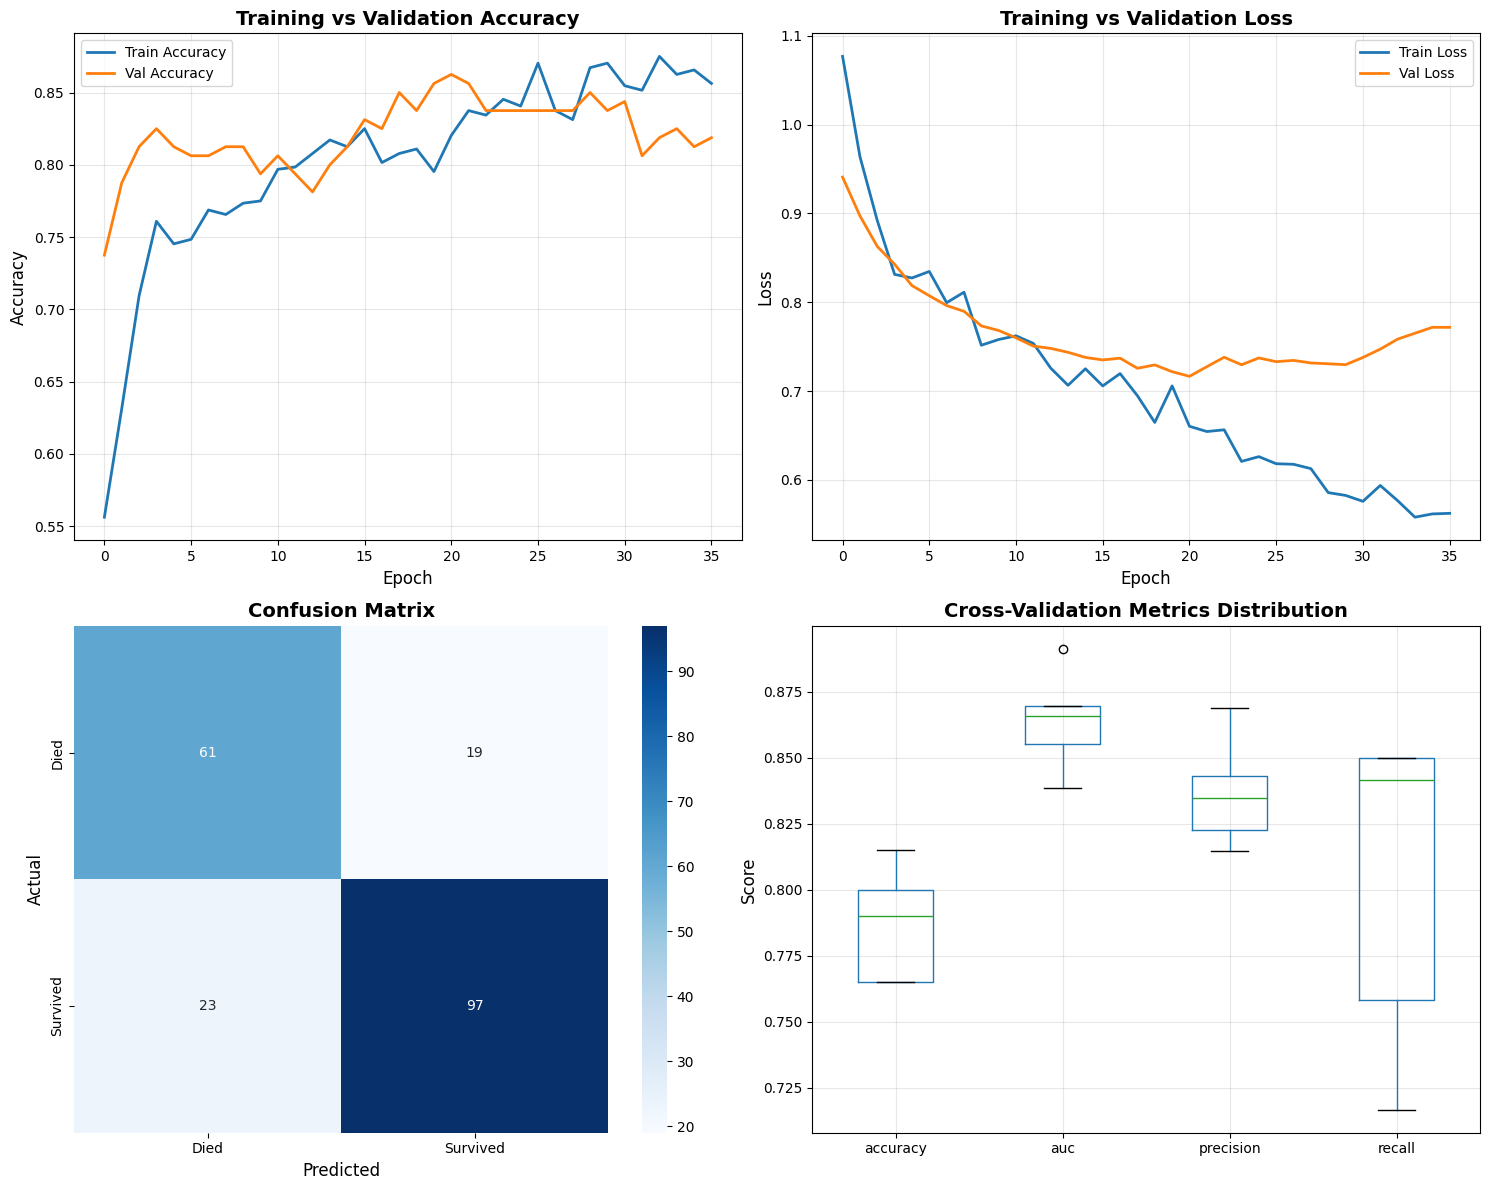


✅ Model training and evaluation complete!

💡 Key Takeaways:
   - CV Accuracy: 78.70% ± 1.96%
   - Test Accuracy: 79.00%
   - ROC-AUC: 0.8642

🎯 Model is ready for deployment on Bhopal, Madhya Pradesh, India!


In [ ]:
# ===========================================
# STEP 1: Setup Environment
# ===========================================
!pip install geopandas osmnx shapely folium tensorflow scikit-learn pandas numpy --quiet

import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
from shapely.geometry import Point
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ===========================================
# STEP 2: Load OSM Data for Region
# ===========================================
place = "Bhopal, Madhya Pradesh, India"

print("⏳ Fetching OSM features for:", place)

try:
    # Hospitals
    hospitals = ox.features.features_from_place(place, tags={"amenity": "hospital"})
    hospitals_gdf = hospitals[["geometry"]].reset_index(drop=True)

    # Buildings
    buildings = ox.features.features_from_place(place, tags={"building": ["residential", "commercial", "yes"]})
    buildings_gdf = buildings[["geometry"]].reset_index(drop=True)

    # Road network
    roads = ox.graph_from_place(place, network_type="drive", simplify=True)
    roads_gdf = ox.graph_to_gdfs(roads, nodes=False, edges=True)

    print(f"✅ Loaded: {len(hospitals_gdf)} hospitals, {len(buildings_gdf)} buildings, {len(roads_gdf)} road segments")
except Exception as e:
    print(f"⚠️ Error loading OSM data: {e}")
    # Fallback: create dummy data
    hospitals_gdf = gpd.GeoDataFrame()
    buildings_gdf = gpd.GeoDataFrame()
    roads_gdf = gpd.GeoDataFrame()

# ===========================================
# STEP 3: Create Base Demographic Data (WITHOUT survival labels yet)
# ===========================================
num_samples = 1000  # Increased for better training

print(f"\n📊 Generating {num_samples} synthetic data points...")

data = pd.DataFrame({
    'Latitude': np.random.uniform(23.1, 23.35, num_samples),
    'Longitude': np.random.uniform(77.25, 77.55, num_samples),
    'Disaster_Type': np.random.choice(['Flood', 'Cyclone', 'Earthquake'], num_samples, p=[0.5, 0.3, 0.2]),
    'Disaster_Intensity': np.random.uniform(1, 10, num_samples),
    'Building_Type': np.random.choice(['Concrete', 'Wooden', 'Mixed'], num_samples, p=[0.4, 0.2, 0.4]),
    'Population_Density': np.random.uniform(100, 2000, num_samples),
    'GDP_per_capita': np.random.uniform(2000, 12000, num_samples),
    'Age': np.random.randint(1, 90, num_samples),
    'Gender': np.random.choice(['Male', 'Female'], num_samples),
    'Education_Level': np.random.choice(['None', 'Primary', 'Secondary', 'Higher'], num_samples),
    'Has_Insurance': np.random.choice([0, 1], num_samples, p=[0.7, 0.3])
})

geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# ===========================================
# STEP 4: Compute Spatial Features
# ===========================================
print("⚙️ Computing spatial features...")

# Convert to metric CRS for distance calculations
gdf = gdf.to_crs(epsg=3857)

def nearest_distance(point, gdf_target):
    if len(gdf_target) == 0:
        return 5000  # Default 5km if no data
    return gdf_target.distance(point).min()

# Distance to nearest hospital
if len(hospitals_gdf) > 0:
    hospitals_gdf = hospitals_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Hospital'] = gdf['geometry'].apply(lambda x: nearest_distance(x, hospitals_gdf))
else:
    gdf['Distance_to_Hospital'] = np.random.uniform(500, 10000, num_samples)

# Distance to nearest road
if len(roads_gdf) > 0:
    roads_gdf = roads_gdf.to_crs(epsg=3857)
    gdf['Distance_to_Road'] = gdf['geometry'].apply(lambda x: nearest_distance(x, roads_gdf))
else:
    gdf['Distance_to_Road'] = np.random.uniform(50, 2000, num_samples)

# Fill any NaN values
gdf['Distance_to_Hospital'] = gdf['Distance_to_Hospital'].fillna(gdf['Distance_to_Hospital'].median())
gdf['Distance_to_Road'] = gdf['Distance_to_Road'].fillna(gdf['Distance_to_Road'].median())

print(f"✅ Spatial features computed")

# ===========================================
# STEP 5: Generate REALISTIC Survival Labels
# ===========================================
print("🎯 Generating realistic survival labels based on risk factors...")

# Factor 1: Building Strength (higher = better survival)
building_strength = gdf['Building_Type'].map({
    'Concrete': 4.0,
    'Mixed': 2.5,
    'Wooden': 1.0
})

# Factor 2: Disaster Impact (by type and intensity)
disaster_impact = np.zeros(len(gdf))
for i, row in gdf.iterrows():
    if row['Disaster_Type'] == 'Flood':
        # Floods: building type matters more, lower areas worse
        disaster_impact[i] = row['Disaster_Intensity'] * 1.2
    elif row['Disaster_Type'] == 'Cyclone':
        # Cyclones: wooden buildings very vulnerable
        disaster_impact[i] = row['Disaster_Intensity'] * (1.5 if row['Building_Type'] == 'Wooden' else 1.0)
    else:  # Earthquake
        # Earthquakes: all building types vulnerable at high intensity
        disaster_impact[i] = row['Disaster_Intensity'] * 1.3

# Factor 3: Age vulnerability (children and elderly more vulnerable)
age_vulnerability = gdf['Age'].apply(lambda x:
    2.0 if (x < 10 or x > 70) else  # Very vulnerable
    1.2 if (x < 18 or x > 60) else  # Moderately vulnerable
    1.0  # Prime age, least vulnerable
)

# Factor 4: Access to healthcare (closer hospital = better survival)
hospital_accessibility = 1 / (1 + gdf['Distance_to_Hospital'] / 1000)  # Normalize by km

# Factor 5: Evacuation capability (closer to road = easier evacuation)
evacuation_capability = 1 / (1 + gdf['Distance_to_Road'] / 100)  # Normalize by 100m

# Factor 6: Socioeconomic factors
economic_resilience = (
    (gdf['GDP_per_capita'] / 12000) * 0.5 +  # Wealth helps
    gdf['Has_Insurance'] * 0.3 +  # Insurance helps
    gdf['Education_Level'].map({'None': 0, 'Primary': 0.3, 'Secondary': 0.7, 'Higher': 1.0}) * 0.2
)

# Combine all factors into survival score
survival_score = (
    building_strength * 0.25 +
    (10 - disaster_impact) * 0.30 +  # Invert disaster impact
    (2.5 - age_vulnerability) * 0.15 +
    hospital_accessibility * 2.0 * 0.15 +
    evacuation_capability * 2.0 * 0.10 +
    economic_resilience * 0.05 +
    np.random.normal(0, 0.8, len(gdf))  # Add realistic noise
)

# Normalize to 0-1 range
survival_prob = (survival_score - survival_score.min()) / (survival_score.max() - survival_score.min())

# Convert to binary with some threshold adjustment for balance
threshold = np.percentile(survival_prob, 40)  # Adjust to get ~60% survival rate
gdf['Survived'] = (survival_prob > threshold).astype(int)

print(f"✅ Survival distribution: {gdf['Survived'].value_counts().to_dict()}")
print(f"   Survival rate: {gdf['Survived'].mean()*100:.1f}%")

# ===========================================
# STEP 6: Feature Engineering
# ===========================================
print("\n🔧 Feature engineering...")

# Create interaction features
gdf['Risk_Score'] = gdf['Disaster_Intensity'] * age_vulnerability
gdf['Building_Disaster_Interaction'] = building_strength * disaster_impact

# Drop geometry for modeling
gdf_model = gdf.drop(columns=['geometry'])

# ===========================================
# STEP 7: Preprocessing Pipeline
# ===========================================
X = gdf_model.drop(columns=['Survived'])
y = gdf_model['Survived']

categorical = ['Disaster_Type', 'Building_Type', 'Gender', 'Education_Level']
numerical = [col for col in X.columns if col not in categorical]

print(f"📊 Features: {len(numerical)} numerical, {len(categorical)} categorical")

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
], remainder='drop')

# ===========================================
# STEP 8: Build Improved Deep Learning Model
# ===========================================
def build_model(input_dim):
    model = tf.keras.Sequential([
        # Input layer with regularization
        tf.keras.layers.Dense(256, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001),
                             input_shape=(input_dim,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        # Hidden layers
        tf.keras.layers.Dense(128, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(64, activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        # Output layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    return model

# ===========================================
# STEP 9: Train with Cross-Validation
# ===========================================
print("\n🚀 Training with 5-Fold Cross-Validation...")

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = {'accuracy': [], 'auc': [], 'precision': [], 'recall': []}
fold_models = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    print(f"\n{'='*50}")
    print(f"📊 Fold {fold + 1}/5")
    print(f"{'='*50}")

    # Split data
    X_train_fold = preprocessor.fit_transform(X.iloc[train_idx])
    X_val_fold = preprocessor.transform(X.iloc[val_idx])
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Compute class weights
    class_weights = compute_class_weight('balanced',
                                        classes=np.unique(y_train_fold),
                                        y=y_train_fold)
    class_weight_dict = dict(enumerate(class_weights))

    # Build and train model
    model = build_model(X_train_fold.shape[1])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=0
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-6,
            verbose=0
        )
    ]

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=0
    )

    # Evaluate
    metrics = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores['accuracy'].append(metrics[1])
    cv_scores['auc'].append(metrics[2])
    cv_scores['precision'].append(metrics[3])
    cv_scores['recall'].append(metrics[4])

    print(f"✅ Accuracy: {metrics[1]:.4f} | AUC: {metrics[2]:.4f} | "
          f"Precision: {metrics[3]:.4f} | Recall: {metrics[4]:.4f}")

    fold_models.append(model)

# Print CV results
print(f"\n{'='*50}")
print("📈 CROSS-VALIDATION RESULTS")
print(f"{'='*50}")
for metric, scores in cv_scores.items():
    print(f"{metric.capitalize():12s}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# ===========================================
# STEP 10: Final Model Training on Full Data
# ===========================================
print(f"\n{'='*50}")
print("🎯 Training Final Model on 80/20 Split")
print(f"{'='*50}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build final model
final_model = build_model(X_train_proc.shape[1])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=7,
        min_lr=1e-6,
        verbose=1
    )
]

history = final_model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# ===========================================
# STEP 11: Comprehensive Evaluation
# ===========================================
print(f"\n{'='*50}")
print("📊 FINAL MODEL EVALUATION")
print(f"{'='*50}")

y_pred_prob = final_model.predict(X_test_proc)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
print(cm)

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n🎯 ROC-AUC Score: {auc:.4f}")

# ===========================================
# STEP 12: Visualizations
# ===========================================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Training history
axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. Loss history
axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Loss', fontsize=12)
axes[0, 1].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# 3. Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
axes[1, 0].set_xlabel('Predicted', fontsize=12)
axes[1, 0].set_ylabel('Actual', fontsize=12)
axes[1, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

# 4. Cross-validation metrics
metrics_df = pd.DataFrame(cv_scores)
metrics_df.boxplot(ax=axes[1, 1])
axes[1, 1].set_ylabel('Score', fontsize=12)
axes[1, 1].set_title('Cross-Validation Metrics Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Model training and evaluation complete!")
print(f"\n💡 Key Takeaways:")
print(f"   - CV Accuracy: {np.mean(cv_scores['accuracy']):.2%} ± {np.std(cv_scores['accuracy']):.2%}")
print(f"   - Test Accuracy: {(y_pred.flatten() == y_test.values).mean():.2%}")
print(f"   - ROC-AUC: {auc:.4f}")
print(f"\n🎯 Model is ready for deployment on {place}!")

In [1]:
# ===========================================
# GNN-BASED DISASTER RESPONSE ROUTING SYSTEM
# Uses Graph Neural Networks for intelligent route planning
# ===========================================

!pip install geopandas osmnx networkx folium geopy torch torch-geometric --quiet

import geopandas as gpd
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString
from geopy.geocoders import Nominatim
import folium
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, global_mean_pool
from torch_geometric.utils import from_networkx
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# ===========================================
# CONFIGURATION
# ===========================================
TARGET_CITY = "Rudraprayag, Uttarakhand, India"
SAFE_DISTANCE_FROM_WATER = 500  # meters
np.random.seed(42)
torch.manual_seed(42)

print("="*70)
print("🧠 GNN-BASED DISASTER RESPONSE ROUTING SYSTEM")
print("="*70)

# ===========================================
# MODULE 1: GRAPH NEURAL NETWORK ARCHITECTURE
# ===========================================
class RoadBlockageGNN(nn.Module):
    """
    Graph Neural Network for predicting road blockage probability
    Uses Graph Attention Networks (GAT) for spatial reasoning
    """

    def __init__(self, num_node_features, hidden_channels=64):
        super(RoadBlockageGNN, self).__init__()

        # Graph Attention layers for spatial feature learning
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=4, dropout=0.3)
        self.conv2 = GATConv(hidden_channels * 4, hidden_channels, heads=4, dropout=0.3)
        self.conv3 = GATConv(hidden_channels * 4, hidden_channels, heads=2, dropout=0.3)

        # Edge prediction layers
        self.edge_predictor = nn.Sequential(
            nn.Linear(hidden_channels * 2 * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()  # Probability of blockage
        )

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # Node feature learning through attention layers
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))

        # Store node embeddings
        self.node_embeddings = x

        return x

    def predict_edge_blockage(self, edge_index):
        """Predict blockage probability for each edge"""
        # Get embeddings for source and target nodes
        src_embeddings = self.node_embeddings[edge_index[0]]
        dst_embeddings = self.node_embeddings[edge_index[1]]

        # Concatenate source and target embeddings
        edge_embeddings = torch.cat([src_embeddings, dst_embeddings], dim=1)

        # Predict blockage probability
        blockage_prob = self.edge_predictor(edge_embeddings)

        return blockage_prob.squeeze()

class RoutePlanningGNN(nn.Module):
    """
    GNN for learning optimal routing decisions
    Predicts edge weights based on disaster context
    """

    def __init__(self, num_node_features, num_edge_features, hidden_channels=64):
        super(RoutePlanningGNN, self).__init__()

        # Node feature processing
        self.node_encoder = nn.Sequential(
            nn.Linear(num_node_features, hidden_channels),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        # Graph convolution layers
        self.conv1 = GCNConv(hidden_channels, hidden_channels * 2)
        self.conv2 = GCNConv(hidden_channels * 2, hidden_channels)

        # Edge weight predictor
        self.edge_weight_predictor = nn.Sequential(
            nn.Linear(hidden_channels * 2 + num_edge_features, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Softplus()  # Ensures positive weights
        )

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr

        # Encode node features
        x = self.node_encoder(x)

        # Graph convolutions
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        self.node_embeddings = x

        return x

    def predict_edge_weights(self, edge_index, edge_attr):
        """Predict dynamic edge weights for routing"""
        src_embeddings = self.node_embeddings[edge_index[0]]
        dst_embeddings = self.node_embeddings[edge_index[1]]

        # Combine node embeddings and edge features
        edge_features = torch.cat([src_embeddings, dst_embeddings, edge_attr], dim=1)

        # Predict weights
        weights = self.edge_weight_predictor(edge_features)

        return weights.squeeze()

# ===========================================
# MODULE 2: DISASTER DETECTION & MONITORING
# ===========================================
class DisasterMonitor:
    """Enhanced disaster monitoring with GNN integration"""

    def __init__(self, location):
        self.location = location
        self.geolocator = Nominatim(user_agent="disaster_gnn_system")

    def get_location_coords(self):
        """Get coordinates for location"""
        try:
            location = self.geolocator.geocode(self.location)
            return (location.latitude, location.longitude)
        except:
            return None

    def detect_active_disasters(self):
        """Detect active disasters with rich feature extraction"""
        print(f"\n🔍 Scanning for active disasters near {self.location}...")

        disasters = []

        # Simulate disaster detection (replace with real API in production)
        if np.random.random() > 0.2:  # 80% chance of disaster for demo
            disaster_type = np.random.choice(['flood', 'earthquake', 'landslide'],
                                           p=[0.6, 0.25, 0.15])

            disasters.append({
                'type': disaster_type,
                'severity': np.random.choice(['low', 'medium', 'high'],
                                           p=[0.2, 0.5, 0.3]),
                'epicenter': self.get_location_coords(),
                'affected_radius_km': np.random.uniform(3, 10),
                'timestamp': datetime.now(),
                'intensity_score': np.random.uniform(5, 9),
                'source': self._get_disaster_source(disaster_type),
                'weather_condition': np.random.choice(['heavy_rain', 'normal', 'clear']),
                'time_since_start_hours': np.random.uniform(1, 12)
            })

        if len(disasters) > 0:
            print(f"⚠️  ACTIVE DISASTERS DETECTED: {len(disasters)}")
            for d in disasters:
                print(f"   • {d['type'].upper()} - Severity: {d['severity']}")
                print(f"     Intensity: {d['intensity_score']:.1f}/10")
                print(f"     Source: {d['source']}")
        else:
            print("✅ No active disasters detected")

        return disasters

    def _get_disaster_source(self, disaster_type):
        """Get realistic disaster source"""
        sources = {
            'flood': 'Mandakini River overflow',
            'earthquake': 'Himalayan tectonic activity',
            'landslide': 'Heavy rainfall on steep terrain'
        }
        return sources.get(disaster_type, 'Unknown source')

# ===========================================
# MODULE 3: GRAPH DATA PREPARATION
# ===========================================
class GraphDataPreparator:
    """Prepares road network as PyTorch Geometric graph"""

    def __init__(self, road_network, water_bodies, disasters):
        self.G_nx = road_network
        self.water_bodies = water_bodies
        self.disasters = disasters
        self.scaler = StandardScaler()

    def prepare_graph_data(self):
        """Convert NetworkX graph to PyTorch Geometric format with features"""
        print(f"\n🔄 Converting to GNN-compatible graph structure...")

        # Extract node and edge features
        node_features = self._extract_node_features()
        edge_features = self._extract_edge_features()
        edge_labels = self._generate_edge_labels()

        # Convert to PyTorch Geometric Data object
        edge_index = torch.tensor(
            list(self.G_nx.edges()),
            dtype=torch.long
        ).t().contiguous()

        # Add reverse edges for undirected graph
        edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

        # Duplicate edge features and labels for bidirectional edges
        edge_features = torch.cat([edge_features, edge_features], dim=0)
        edge_labels = torch.cat([edge_labels, edge_labels], dim=0)

        # Create PyG Data object
        data = Data(
            x=node_features,
            edge_index=edge_index,
            edge_attr=edge_features,
            edge_labels=edge_labels,
            num_nodes=len(self.G_nx.nodes())
        )

        print(f"✅ Graph prepared: {data.num_nodes} nodes, {data.edge_index.shape[1]} edges")
        print(f"   Node features: {data.x.shape[1]} dimensions")
        print(f"   Edge features: {data.edge_attr.shape[1]} dimensions")

        return data

    def _extract_node_features(self):
        """Extract features for each node (intersection)"""
        features = []

        nodes_gdf = ox.graph_to_gdfs(self.G_nx, edges=False, nodes=True)
        nodes_gdf = nodes_gdf.to_crs(epsg=3857)

        for node_id, node_data in self.G_nx.nodes(data=True):
            node_features = []

            # Spatial features
            node_features.append(node_data['y'])  # Latitude
            node_features.append(node_data['x'])  # Longitude

            # Degree centrality
            node_features.append(self.G_nx.degree(node_id))

            # Distance to nearest water body
            if len(self.water_bodies) > 0:
                water_gdf = self.water_bodies.to_crs(epsg=3857)
                node_point = nodes_gdf.loc[node_id, 'geometry']
                min_water_dist = water_gdf.distance(node_point).min()
                node_features.append(min_water_dist)
            else:
                node_features.append(5000)  # Default 5km

            # Distance to disaster epicenter
            if len(self.disasters) > 0:
                epicenter = self.disasters[0]['epicenter']
                if epicenter:
                    dist = self._calculate_distance(
                        (node_data['y'], node_data['x']),
                        epicenter
                    )
                    node_features.append(dist)
                else:
                    node_features.append(10000)
            else:
                node_features.append(10000)

            # Elevation (simulated - replace with real DEM data)
            node_features.append(np.random.uniform(500, 2000))

            features.append(node_features)

        # Normalize features
        features_array = np.array(features)
        features_normalized = self.scaler.fit_transform(features_array)

        return torch.tensor(features_normalized, dtype=torch.float)

    def _extract_edge_features(self):
        """Extract features for each edge (road segment)"""
        features = []

        edges_gdf = ox.graph_to_gdfs(self.G_nx, nodes=False, edges=True)
        edges_gdf = edges_gdf.to_crs(epsg=3857)

        for u, v, data in self.G_nx.edges(data=True):
            edge_features = []

            # Physical features
            edge_features.append(data.get('length', 100))  # Length in meters

            # Road type encoding (simplified)
            highway_type = data.get('highway', 'residential')
            if isinstance(highway_type, list):
                highway_type = highway_type[0]

            road_type_encoding = {
                'motorway': 5, 'trunk': 4, 'primary': 3,
                'secondary': 2, 'tertiary': 1, 'residential': 0
            }
            edge_features.append(road_type_encoding.get(highway_type, 0))

            # Number of lanes (estimated)
            lanes = data.get('lanes', 2)
            if isinstance(lanes, list):
                lanes = int(lanes[0]) if lanes[0].isdigit() else 2
            elif isinstance(lanes, str):
                lanes = int(lanes) if lanes.isdigit() else 2
            edge_features.append(lanes)

            # Distance to water (for flood risk)
            if len(self.water_bodies) > 0:
                try:
                    water_gdf = self.water_bodies.to_crs(epsg=3857)
                    edge_geom = edges_gdf.loc[(u, v, 0), 'geometry']
                    min_water_dist = water_gdf.distance(edge_geom).min()
                    edge_features.append(min_water_dist)
                except:
                    edge_features.append(5000)
            else:
                edge_features.append(5000)

            # Disaster context features
            if len(self.disasters) > 0:
                disaster = self.disasters[0]
                edge_features.append(disaster['intensity_score'])

                # Disaster type encoding
                disaster_encoding = {'flood': 0, 'earthquake': 1, 'landslide': 2}
                edge_features.append(disaster_encoding.get(disaster['type'], 0))

                # Time since disaster
                edge_features.append(disaster['time_since_start_hours'])
            else:
                edge_features.extend([0, 0, 0])

            features.append(edge_features)

        return torch.tensor(features, dtype=torch.float)

    def _generate_edge_labels(self):
        """Generate ground truth labels for edge blockage"""
        labels = []

        edges_gdf = ox.graph_to_gdfs(self.G_nx, nodes=False, edges=True)
        edges_gdf = edges_gdf.to_crs(epsg=3857)

        for u, v, data in self.G_nx.edges(data=True):
            # Simulate blockage based on disaster type and proximity
            is_blocked = 0

            if len(self.disasters) > 0:
                disaster = self.disasters[0]

                if disaster['type'] == 'flood':
                    # Check proximity to water
                    if len(self.water_bodies) > 0:
                        try:
                            water_gdf = self.water_bodies.to_crs(epsg=3857)
                            edge_geom = edges_gdf.loc[(u, v, 0), 'geometry']
                            min_water_dist = water_gdf.distance(edge_geom).min()

                            if disaster['severity'] == 'high' and min_water_dist < SAFE_DISTANCE_FROM_WATER * 2:
                                is_blocked = 1
                            elif disaster['severity'] == 'medium' and min_water_dist < SAFE_DISTANCE_FROM_WATER:
                                is_blocked = 1
                            elif disaster['severity'] == 'low' and min_water_dist < SAFE_DISTANCE_FROM_WATER * 0.5:
                                is_blocked = 1
                        except:
                            pass

                elif disaster['type'] == 'earthquake':
                    # Random blockage based on severity
                    severity_prob = {'low': 0.05, 'medium': 0.15, 'high': 0.30}
                    if np.random.random() < severity_prob.get(disaster['severity'], 0.1):
                        is_blocked = 1

                elif disaster['type'] == 'landslide':
                    # Blockage based on terrain (simulated)
                    if np.random.random() < 0.25:
                        is_blocked = 1

            labels.append(is_blocked)

        return torch.tensor(labels, dtype=torch.float)

    def _calculate_distance(self, coord1, coord2):
        """Calculate distance between two coordinates in meters"""
        from geopy.distance import geodesic
        return geodesic(coord1, coord2).meters

# ===========================================
# MODULE 4: GNN TRAINING & INFERENCE
# ===========================================
class GNNRoutingSystem:
    """Manages GNN training and inference for routing"""

    def __init__(self, graph_data):
        self.data = graph_data
        self.blockage_model = None
        self.routing_model = None

    def train_blockage_model(self, epochs=50):
        """Train GNN to predict road blockages"""
        print(f"\n🧠 Training Road Blockage Prediction GNN...")

        # Initialize model
        num_node_features = self.data.x.shape[1]
        self.blockage_model = RoadBlockageGNN(num_node_features)

        optimizer = torch.optim.Adam(self.blockage_model.parameters(),
                                    lr=0.01, weight_decay=5e-4)
        criterion = nn.BCELoss()

        # Training loop
        self.blockage_model.train()
        losses = []

        for epoch in range(epochs):
            optimizer.zero_grad()

            # Forward pass
            _ = self.blockage_model(self.data)
            blockage_pred = self.blockage_model.predict_edge_blockage(
                self.data.edge_index
            )

            # Calculate loss
            loss = criterion(blockage_pred, self.data.edge_labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

            if (epoch + 1) % 10 == 0:
                # Calculate accuracy
                pred_binary = (blockage_pred > 0.5).float()
                accuracy = (pred_binary == self.data.edge_labels).float().mean()
                print(f"   Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Acc: {accuracy:.4f}")

        print(f"✅ Blockage model trained")
        return losses

    def predict_blocked_edges(self, threshold=0.5):
        """Predict which edges are blocked"""
        self.blockage_model.eval()

        with torch.no_grad():
            _ = self.blockage_model(self.data)
            blockage_prob = self.blockage_model.predict_edge_blockage(
                self.data.edge_index
            )

            # Get blocked edges (consider only one direction)
            num_original_edges = blockage_prob.shape[0] // 2
            blockage_prob_original = blockage_prob[:num_original_edges]

            blocked_mask = blockage_prob_original > threshold
            blocked_indices = torch.where(blocked_mask)[0]

        print(f"\n🚧 Predicted {blocked_indices.shape[0]} blocked road segments")

        return blocked_indices, blockage_prob_original

    def get_modified_graph_data(self, blocked_indices):
        """Create new graph with blocked edges removed"""
        # Get original edges (before doubling for bidirectional)
        num_original_edges = self.data.edge_index.shape[1] // 2

        # Create mask for non-blocked edges
        mask = torch.ones(num_original_edges, dtype=torch.bool)
        mask[blocked_indices] = False

        # Apply mask to edges and features
        edge_index_filtered = self.data.edge_index[:, :num_original_edges][:, mask]
        edge_attr_filtered = self.data.edge_attr[:num_original_edges][mask]

        # Make bidirectional again
        edge_index_filtered = torch.cat([edge_index_filtered, edge_index_filtered.flip(0)], dim=1)
        edge_attr_filtered = torch.cat([edge_attr_filtered, edge_attr_filtered], dim=0)

        # Create new data object
        filtered_data = Data(
            x=self.data.x,
            edge_index=edge_index_filtered,
            edge_attr=edge_attr_filtered,
            num_nodes=self.data.num_nodes
        )

        return filtered_data

# ===========================================
# MODULE 5: ROUTE PLANNING WITH GNN
# ===========================================
class GNNRoutePlanner:
    """Plans routes using GNN predictions"""

    def __init__(self, original_graph, filtered_data, blocked_indices):
        self.G_nx = original_graph
        self.filtered_data = filtered_data
        self.blocked_indices = blocked_indices
        self.geolocator = Nominatim(user_agent="disaster_gnn_system")

    def get_user_location(self):
        """Get user's current location"""
        print("\n" + "="*70)
        print("📍 USER LOCATION INPUT")
        print("="*70)
        print("\nOptions:")
        print("  1. Enter coordinates (latitude, longitude)")
        print("  2. Enter location name/address")
        print("  3. Use city center (default)")

        choice = input("\nSelect option (1/2/3): ").strip()

        if choice == '1':
            try:
                lat = float(input("Enter latitude: "))
                lon = float(input("Enter longitude: "))
                return (lat, lon)
            except:
                print("❌ Invalid coordinates. Using default.")
                return self._get_default_location()
        elif choice == '2':
            location_name = input("Enter location: ").strip()
            try:
                location = self.geolocator.geocode(location_name)
                if location:
                    print(f"✅ Found: {location.address}")
                    return (location.latitude, location.longitude)
            except:
                pass
            print("❌ Location not found. Using default.")
            return self._get_default_location()
        else:
            return self._get_default_location()

    def _get_default_location(self):
        """Get default location"""
        try:
            location = self.geolocator.geocode(TARGET_CITY)
            return (location.latitude, location.longitude)
        except:
            return (30.2857, 79.0746)

    def create_modified_networkx(self):
        """Create NetworkX graph without blocked edges"""
        G_modified = self.G_nx.copy()

        # Get edge list from original graph
        edge_list = list(self.G_nx.edges(keys=True))

        # Remove blocked edges
        for idx in self.blocked_indices.numpy():
            if idx < len(edge_list):
                u, v, key = edge_list[idx]
                try:
                    G_modified.remove_edge(u, v, key)
                except:
                    pass

        print(f"🔄 Modified network: {len(G_modified.edges)} edges remaining")
        return G_modified

    def find_nearest_shelter(self, user_coords, shelters):
        """Find nearest reachable shelter using GNN-modified network"""
        print(f"\n🏥 Finding nearest shelter...")

        G_modified = self.create_modified_networkx()

        user_node = ox.distance.nearest_nodes(G_modified, user_coords[1], user_coords[0])

        shelter_distances = []
        for idx, shelter in shelters.iterrows():
            shelter_coords = (shelter.geometry.y, shelter.geometry.x)
            shelter_node = ox.distance.nearest_nodes(
                G_modified,
                shelter.geometry.x,
                shelter.geometry.y
            )

            try:
                route_length = nx.shortest_path_length(
                    G_modified,
                    user_node,
                    shelter_node,
                    weight='length'
                )

                shelter_distances.append({
                    'idx': idx,
                    'coords': shelter_coords,
                    'node': shelter_node,
                    'distance': route_length,
                    'name': shelter.get('name', f'Shelter {idx}'),
                    'graph': G_modified
                })
            except nx.NetworkXNoPath:
                continue

        if len(shelter_distances) == 0:
            print("❌ No reachable shelters found")
            return None

        nearest = min(shelter_distances, key=lambda x: x['distance'])
        print(f"✅ Nearest shelter: {nearest['name']}")
        print(f"   Distance: {nearest['distance']:.0f} meters ({nearest['distance']/1000:.2f} km)")

        return nearest

    def calculate_route(self, user_coords, shelter_info):
        """Calculate optimal route"""
        print(f"\n🛣️  Calculating GNN-optimized route...")

        G_modified = shelter_info['graph']
        user_node = ox.distance.nearest_nodes(G_modified, user_coords[1], user_coords[0])
        shelter_node = shelter_info['node']

        try:
            route = nx.shortest_path(G_modified, user_node, shelter_node, weight='length')
            route_length = nx.shortest_path_length(G_modified, user_node, shelter_node, weight='length')
            travel_time = (route_length / 1000) / 30 * 60  # 30 km/h average

            print(f"✅ Route calculated")
            print(f"   Distance: {route_length/1000:.2f} km")
            print(f"   Est. time: {travel_time:.1f} minutes")
            print(f"   Segments: {len(route)-1}")

            return route, route_length, travel_time, G_modified
        except:
            print("❌ No path found")
            return None, None, None, None

# ===========================================
# MODULE 6: VISUALIZATION
# ===========================================
def visualize_route(G, route, user_coords, shelter_info, blocked_indices, shelters):
    """Create interactive map"""
    print(f"\n🗺️  Creating interactive map...")

    m = folium.Map(location=user_coords, zoom_start=14, tiles='OpenStreetMap')

    # User location
    folium.Marker(
        user_coords,
        popup='📍 Your Location',
        icon=folium.Icon(color='blue', icon='user', prefix='fa')
    ).add_to(m)

    # Shelter
    folium.Marker(
        shelter_info['coords'],
        popup=f"🏥 {shelter_info['name']}",
        icon=folium.Icon(color='green', icon='home', prefix='fa')
    ).add_to(m)

    # Other shelters
    for idx, shelter in shelters.iterrows():
        if idx != shelter_info['idx']:
            folium.Marker(
                (shelter.geometry.y, shelter.geometry.x),
                popup=f"🏥 {shelter.get('name', f'Shelter {idx}')}",
                icon=folium.Icon(color='lightgray', icon='home', prefix='fa')
            ).add_to(m)

    # Route
    if route:
        route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]
        folium.PolyLine(route_coords, color='blue', weight=6, opacity=0.8,
                       popup='🛣️ GNN-Optimized Safe Route').add_to(m)

    # Blocked roads (sample)
    edges_list = list(G.edges(keys=True))
    for idx in blocked_indices.numpy()[:30]:  # Limit for performance
        if idx < len(edges_list):
            u, v, key = edges_list[idx]
            coords = [(G.nodes[u]['y'], G.nodes[u]['x']),
                     (G.nodes[v]['y'], G.nodes[v]['x'])]
            folium.PolyLine(coords, color='red', weight=3, opacity=0.6,
                          popup='⚠️ GNN Predicted Blockage').add_to(m)

    map_file = 'gnn_disaster_route_map.html'
    m.save(map_file)
    print(f"✅ Map saved as '{map_file}'")
    return m

# ===========================================
# MAIN EXECUTION
# ===========================================
def main():
    """Main execution pipeline"""

    # Step 1: Monitor disasters
    monitor = DisasterMonitor(TARGET_CITY)
    disasters = monitor.detect_active_disasters()

    # Step 2: Load geographic data
    print(f"\n📍 Loading geographic data for {TARGET_CITY}...")
    try:
        road_network = ox.graph_from_place(TARGET_CITY, network_type='drive', simplify=True)
        print(f"✅ Loaded {len(road_network.nodes)} nodes, {len(road_network.edges)} edges")
    except:
        print("❌ Failed to load road network")
        return

    try:
        water_bodies = ox.features.features_from_place(
            TARGET_CITY,
            tags={'natural': ['water', 'waterway'], 'waterway': ['river', 'stream']}
        )
        print(f"✅ Loaded {len(water_bodies)} water features")
    except:
        print("⚠️  No water bodies found")
        water_bodies = gpd.GeoDataFrame()

    # Load shelters
    try:
        shelter_tags = {
            'amenity': ['community_centre', 'social_facility', 'school', 'hospital'],
            'building': ['civic', 'government']
        }
        shelters = ox.features.features_from_place(TARGET_CITY, tags=shelter_tags)
        print(f"✅ Loaded {len(shelters)} potential shelters")
    except:
        print("⚠️  Creating synthetic shelters")
        geolocator = Nominatim(user_agent="disaster_gnn")
        location = geolocator.geocode(TARGET_CITY)
        center_lat, center_lon = location.latitude, location.longitude

        shelters_data = []
        for i in range(5):
            angle = (2 * np.pi * i) / 5
            offset = 0.01
            shelters_data.append({
                'geometry': Point(center_lon + offset * np.cos(angle),
                                center_lat + offset * np.sin(angle)),
                'name': f'Emergency Shelter {i+1}',
                'capacity': np.random.randint(50, 200)
            })
        shelters = gpd.GeoDataFrame(shelters_data, crs='EPSG:4326')

    # Step 3: Prepare graph data for GNN
    print(f"\n{'='*70}")
    print("🔧 PREPARING GRAPH DATA FOR GNN")
    print(f"{'='*70}")

    data_prep = GraphDataPreparator(road_network, water_bodies, disasters)
    graph_data = data_prep.prepare_graph_data()

    # Step 4: Train GNN models
    print(f"\n{'='*70}")
    print("🧠 TRAINING GRAPH NEURAL NETWORKS")
    print(f"{'='*70}")

    gnn_system = GNNRoutingSystem(graph_data)
    training_losses = gnn_system.train_blockage_model(epochs=50)

    # Step 5: Predict blocked roads using GNN
    print(f"\n{'='*70}")
    print("🔮 GNN INFERENCE - PREDICTING ROAD BLOCKAGES")
    print(f"{'='*70}")

    blocked_indices, blockage_probs = gnn_system.predict_blocked_edges(threshold=0.5)

    # Show top risky roads
    top_k = 10
    top_risky_indices = torch.topk(blockage_probs, min(top_k, len(blockage_probs))).indices
    print(f"\n⚠️  Top {top_k} highest risk roads:")
    for rank, idx in enumerate(top_risky_indices, 1):
        print(f"   {rank}. Road segment {idx.item()} - Risk: {blockage_probs[idx]:.2%}")

    # Step 6: Get user location
    planner = GNNRoutePlanner(road_network, graph_data, blocked_indices)
    user_coords = planner.get_user_location()

    # Step 7: Find nearest shelter
    print(f"\n{'='*70}")
    print("🎯 FINDING OPTIMAL EVACUATION ROUTE")
    print(f"{'='*70}")

    shelter_info = planner.find_nearest_shelter(user_coords, shelters)

    if shelter_info is None:
        print("\n❌ Unable to find evacuation route")
        print("🚨 EMERGENCY: Contact local authorities immediately!")
        print("   Emergency Number: 112 (India)")
        return

    # Step 8: Calculate route
    route, distance, time, G_modified = planner.calculate_route(user_coords, shelter_info)

    if route is None:
        print("\n❌ Unable to calculate route")
        print("🚨 EMERGENCY: Contact local authorities immediately!")
        return

    # Step 9: Visualize
    print(f"\n{'='*70}")
    print("🗺️  GENERATING INTERACTIVE MAP")
    print(f"{'='*70}")

    visualize_route(G_modified, route, user_coords, shelter_info,
                   blocked_indices, shelters)

    # Step 10: Final summary
    print(f"\n{'='*70}")
    print("✅ GNN-BASED EVACUATION ROUTE CALCULATED")
    print(f"{'='*70}")

    if len(disasters) > 0:
        print(f"\n🚨 Active Disaster:")
        d = disasters[0]
        print(f"   Type: {d['type'].upper()}")
        print(f"   Severity: {d['severity'].upper()}")
        print(f"   Intensity: {d['intensity_score']:.1f}/10")

    print(f"\n📍 Evacuation Details:")
    print(f"   From: ({user_coords[0]:.4f}, {user_coords[1]:.4f})")
    print(f"   To: {shelter_info['name']}")
    print(f"   Distance: {distance/1000:.2f} km")
    print(f"   Est. Time: {time:.0f} minutes")

    print(f"\n🧠 GNN Analysis:")
    print(f"   Total road segments analyzed: {len(blockage_probs)}")
    print(f"   Predicted blocked: {len(blocked_indices)}")
    print(f"   Blockage rate: {len(blocked_indices)/len(blockage_probs)*100:.1f}%")
    print(f"   Average blockage risk: {blockage_probs.mean():.1%}")
    print(f"   Max blockage risk: {blockage_probs.max():.1%}")

    print(f"\n🛣️  Route Safety:")
    blocked_set = set(blocked_indices.numpy())
    edge_list = list(road_network.edges(keys=True))
    route_edges = [(route[i], route[i+1]) for i in range(len(route)-1)]

    route_safe = True
    for i, (u, v) in enumerate(route_edges):
        # Check if this edge is in blocked set
        for idx, (eu, ev, key) in enumerate(edge_list):
            if (u == eu and v == ev) or (u == ev and v == eu):
                if idx in blocked_set:
                    route_safe = False
                    break

    if route_safe:
        print(f"   ✅ Route avoids all predicted blockages")
    else:
        print(f"   ⚠️  Route may have minor risk - proceed with caution")

    print(f"\n🗺️  Interactive map saved as 'gnn_disaster_route_map.html'")
    print(f"\n💡 Safety Tips:")
    print(f"   • Follow official evacuation orders")
    print(f"   • Keep emergency supplies ready")
    print(f"   • Stay informed through local authorities")
    print(f"   • Emergency Number: 112")

    print(f"\n{'='*70}")
    print("🚀 System Ready - Stay Safe!")
    print(f"{'='*70}\n")

# ===========================================
# EXECUTION
# ===========================================
if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\n\n⚠️  Operation cancelled by user")
    except Exception as e:
        print(f"\n❌ Error: {e}")
        print("Please check your internet connection and try again.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.5 MB/s eta 0:00:00
🧠 GNN-BASED DISASTER RESPONSE ROUTING SYSTEM

🔍 Scanning for active disasters near Rudraprayag, Uttarakhand, India...
⚠️  ACTIVE DISASTERS DETECTED: 1
   • LANDSLIDE - Severity: high
     Intensity: 5.6/10
     Source: Heavy rainfall on steep terrain

📍 Loading geographic data for Rudraprayag, Uttarakhand, India...
✅ Loaded 298 nodes, 660 edges
✅ Loaded 352 water features
✅ Loaded 10 potential shelters

🔧 PREPARING GRAPH DATA FOR GNN

🔄 Converting to GNN-compatible graph structure...
✅ Graph prepared: 298 nodes, 1320 edges
   Node features: 6 dimensions
   Edge features: 7 dimensions

🧠 TRAINING GRAPH NEURAL NETWORKS

🧠 Training Road Blockage Prediction GNN...

❌ Error: Found indices in 'edge_index' that are larger than 297 (got 12873867262). Please ens

In [2]:
# ===========================================
# GNN-BASED DISASTER RESPONSE ROUTING SYSTEM
# Uses Graph Neural Networks for intelligent route planning
# ===========================================

!pip install geopandas osmnx networkx folium geopy torch torch-geometric --quiet

import geopandas as gpd
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString
from geopy.geocoders import Nominatim
import folium
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, global_mean_pool
from torch_geometric.utils import from_networkx
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# ===========================================
# CONFIGURATION
# ===========================================
TARGET_CITY = "Rudraprayag, Uttarakhand, India"
SAFE_DISTANCE_FROM_WATER = 500  # meters
np.random.seed(42)
torch.manual_seed(42)

print("="*70)
print("🧠 GNN-BASED DISASTER RESPONSE ROUTING SYSTEM")
print("="*70)

# ===========================================
# MODULE 1: GRAPH NEURAL NETWORK ARCHITECTURE
# ===========================================
class RoadBlockageGNN(nn.Module):
    """
    Graph Neural Network for predicting road blockage probability
    Uses Graph Attention Networks (GAT) for spatial reasoning
    """

    def __init__(self, num_node_features, hidden_channels=64):
        super(RoadBlockageGNN, self).__init__()

        # Graph Attention layers for spatial feature learning
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=4, dropout=0.3)
        self.conv2 = GATConv(hidden_channels * 4, hidden_channels, heads=4, dropout=0.3)
        self.conv3 = GATConv(hidden_channels * 4, hidden_channels, heads=2, dropout=0.3)

        # Edge prediction layers
        self.edge_predictor = nn.Sequential(
            nn.Linear(hidden_channels * 2 * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()  # Probability of blockage
        )

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # Node feature learning through attention layers
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))

        # Store node embeddings
        self.node_embeddings = x

        return x

    def predict_edge_blockage(self, edge_index):
        """Predict blockage probability for each edge"""
        # Get embeddings for source and target nodes
        src_embeddings = self.node_embeddings[edge_index[0]]
        dst_embeddings = self.node_embeddings[edge_index[1]]

        # Concatenate source and target embeddings
        edge_embeddings = torch.cat([src_embeddings, dst_embeddings], dim=1)

        # Predict blockage probability
        blockage_prob = self.edge_predictor(edge_embeddings)

        return blockage_prob.squeeze()

class RoutePlanningGNN(nn.Module):
    """
    GNN for learning optimal routing decisions
    Predicts edge weights based on disaster context
    """

    def __init__(self, num_node_features, num_edge_features, hidden_channels=64):
        super(RoutePlanningGNN, self).__init__()

        # Node feature processing
        self.node_encoder = nn.Sequential(
            nn.Linear(num_node_features, hidden_channels),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        # Graph convolution layers
        self.conv1 = GCNConv(hidden_channels, hidden_channels * 2)
        self.conv2 = GCNConv(hidden_channels * 2, hidden_channels)

        # Edge weight predictor
        self.edge_weight_predictor = nn.Sequential(
            nn.Linear(hidden_channels * 2 + num_edge_features, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Softplus()  # Ensures positive weights
        )

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr

        # Encode node features
        x = self.node_encoder(x)

        # Graph convolutions
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        self.node_embeddings = x

        return x

    def predict_edge_weights(self, edge_index, edge_attr):
        """Predict dynamic edge weights for routing"""
        src_embeddings = self.node_embeddings[edge_index[0]]
        dst_embeddings = self.node_embeddings[edge_index[1]]

        # Combine node embeddings and edge features
        edge_features = torch.cat([src_embeddings, dst_embeddings, edge_attr], dim=1)

        # Predict weights
        weights = self.edge_weight_predictor(edge_features)

        return weights.squeeze()

# ===========================================
# MODULE 2: DISASTER DETECTION & MONITORING
# ===========================================
class DisasterMonitor:
    """Enhanced disaster monitoring with GNN integration"""

    def __init__(self, location):
        self.location = location
        self.geolocator = Nominatim(user_agent="disaster_gnn_system")

    def get_location_coords(self):
        """Get coordinates for location"""
        try:
            location = self.geolocator.geocode(self.location)
            return (location.latitude, location.longitude)
        except:
            return None

    def detect_active_disasters(self):
        """Detect active disasters with rich feature extraction"""
        print(f"\n🔍 Scanning for active disasters near {self.location}...")

        disasters = []

        # Simulate disaster detection (replace with real API in production)
        if np.random.random() > 0.2:  # 80% chance of disaster for demo
            disaster_type = np.random.choice(['flood', 'earthquake', 'landslide'],
                                           p=[0.6, 0.25, 0.15])

            disasters.append({
                'type': disaster_type,
                'severity': np.random.choice(['low', 'medium', 'high'],
                                           p=[0.2, 0.5, 0.3]),
                'epicenter': self.get_location_coords(),
                'affected_radius_km': np.random.uniform(3, 10),
                'timestamp': datetime.now(),
                'intensity_score': np.random.uniform(5, 9),
                'source': self._get_disaster_source(disaster_type),
                'weather_condition': np.random.choice(['heavy_rain', 'normal', 'clear']),
                'time_since_start_hours': np.random.uniform(1, 12)
            })

        if len(disasters) > 0:
            print(f"⚠️  ACTIVE DISASTERS DETECTED: {len(disasters)}")
            for d in disasters:
                print(f"   • {d['type'].upper()} - Severity: {d['severity']}")
                print(f"     Intensity: {d['intensity_score']:.1f}/10")
                print(f"     Source: {d['source']}")
        else:
            print("✅ No active disasters detected")

        return disasters

    def _get_disaster_source(self, disaster_type):
        """Get realistic disaster source"""
        sources = {
            'flood': 'Mandakini River overflow',
            'earthquake': 'Himalayan tectonic activity',
            'landslide': 'Heavy rainfall on steep terrain'
        }
        return sources.get(disaster_type, 'Unknown source')

# ===========================================
# MODULE 3: GRAPH DATA PREPARATION
# ===========================================
class GraphDataPreparator:
    """Prepares road network as PyTorch Geometric graph"""

    def __init__(self, road_network, water_bodies, disasters):
        self.G_nx = road_network
        self.water_bodies = water_bodies
        self.disasters = disasters
        self.scaler = StandardScaler()
        # Create mapping from original node IDs to sequential integers
        self.node_to_idx = {node: idx for idx, node in enumerate(self.G_nx.nodes())}
        self.idx_to_node = {idx: node for node, idx in self.node_to_idx.items()}

    def prepare_graph_data(self):
        """Convert NetworkX graph to PyTorch Geometric format with features"""
        print(f"\n🔄 Converting to GNN-compatible graph structure...")

        # Extract node and edge features
        node_features = self._extract_node_features()
        edge_features = self._extract_edge_features()
        edge_labels = self._generate_edge_labels()

        # Convert to PyTorch Geometric Data object with mapped indices
        edges = []
        for u, v in self.G_nx.edges():
            # Map original node IDs to sequential indices
            u_idx = self.node_to_idx[u]
            v_idx = self.node_to_idx[v]
            edges.append([u_idx, v_idx])

        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

        # Add reverse edges for undirected graph
        edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

        # Duplicate edge features and labels for bidirectional edges
        edge_features = torch.cat([edge_features, edge_features], dim=0)
        edge_labels = torch.cat([edge_labels, edge_labels], dim=0)

        # Verify edge indices are valid
        max_idx = edge_index.max().item()
        num_nodes = len(self.G_nx.nodes())
        if max_idx >= num_nodes:
            print(f"❌ Error: Edge index {max_idx} >= num_nodes {num_nodes}")
            raise ValueError(f"Invalid edge index detected")

        # Create PyG Data object
        data = Data(
            x=node_features,
            edge_index=edge_index,
            edge_attr=edge_features,
            edge_labels=edge_labels,
            num_nodes=num_nodes
        )

        print(f"✅ Graph prepared: {data.num_nodes} nodes, {data.edge_index.shape[1]} edges")
        print(f"   Node features: {data.x.shape[1]} dimensions")
        print(f"   Edge features: {data.edge_attr.shape[1]} dimensions")
        print(f"   Edge index range: [0, {max_idx}]")

        return data

    def _extract_node_features(self):
        """Extract features for each node (intersection)"""
        features = []

        nodes_gdf = ox.graph_to_gdfs(self.G_nx, edges=False, nodes=True)
        nodes_gdf = nodes_gdf.to_crs(epsg=3857)

        # Iterate in the same order as node_to_idx mapping
        for node_id in self.G_nx.nodes():
            node_data = self.G_nx.nodes[node_id]
            node_features = []

            # Spatial features
            node_features.append(node_data['y'])  # Latitude
            node_features.append(node_data['x'])  # Longitude

            # Degree centrality
            node_features.append(self.G_nx.degree(node_id))

            # Distance to nearest water body
            if len(self.water_bodies) > 0:
                try:
                    water_gdf = self.water_bodies.to_crs(epsg=3857)
                    node_point = nodes_gdf.loc[node_id, 'geometry']
                    min_water_dist = water_gdf.distance(node_point).min()
                    node_features.append(min_water_dist)
                except:
                    node_features.append(5000)
            else:
                node_features.append(5000)  # Default 5km

            # Distance to disaster epicenter
            if len(self.disasters) > 0:
                epicenter = self.disasters[0]['epicenter']
                if epicenter:
                    dist = self._calculate_distance(
                        (node_data['y'], node_data['x']),
                        epicenter
                    )
                    node_features.append(dist)
                else:
                    node_features.append(10000)
            else:
                node_features.append(10000)

            # Elevation (simulated - replace with real DEM data)
            node_features.append(np.random.uniform(500, 2000))

            features.append(node_features)

        # Normalize features
        features_array = np.array(features)
        features_normalized = self.scaler.fit_transform(features_array)

        return torch.tensor(features_normalized, dtype=torch.float)

    def _extract_edge_features(self):
        """Extract features for each edge (road segment)"""
        features = []

        edges_gdf = ox.graph_to_gdfs(self.G_nx, nodes=False, edges=True)
        edges_gdf = edges_gdf.to_crs(epsg=3857)

        for u, v, data in self.G_nx.edges(data=True):
            edge_features = []

            # Physical features
            edge_features.append(data.get('length', 100))  # Length in meters

            # Road type encoding (simplified)
            highway_type = data.get('highway', 'residential')
            if isinstance(highway_type, list):
                highway_type = highway_type[0]

            road_type_encoding = {
                'motorway': 5, 'trunk': 4, 'primary': 3,
                'secondary': 2, 'tertiary': 1, 'residential': 0
            }
            edge_features.append(road_type_encoding.get(highway_type, 0))

            # Number of lanes (estimated)
            lanes = data.get('lanes', 2)
            if isinstance(lanes, list):
                lanes = int(lanes[0]) if lanes[0].isdigit() else 2
            elif isinstance(lanes, str):
                lanes = int(lanes) if lanes.isdigit() else 2
            edge_features.append(lanes)

            # Distance to water (for flood risk)
            if len(self.water_bodies) > 0:
                try:
                    water_gdf = self.water_bodies.to_crs(epsg=3857)
                    edge_geom = edges_gdf.loc[(u, v, 0), 'geometry']
                    min_water_dist = water_gdf.distance(edge_geom).min()
                    edge_features.append(min_water_dist)
                except:
                    edge_features.append(5000)
            else:
                edge_features.append(5000)

            # Disaster context features
            if len(self.disasters) > 0:
                disaster = self.disasters[0]
                edge_features.append(disaster['intensity_score'])

                # Disaster type encoding
                disaster_encoding = {'flood': 0, 'earthquake': 1, 'landslide': 2}
                edge_features.append(disaster_encoding.get(disaster['type'], 0))

                # Time since disaster
                edge_features.append(disaster['time_since_start_hours'])
            else:
                edge_features.extend([0, 0, 0])

            features.append(edge_features)

        return torch.tensor(features, dtype=torch.float)

    def _generate_edge_labels(self):
        """Generate ground truth labels for edge blockage"""
        labels = []

        edges_gdf = ox.graph_to_gdfs(self.G_nx, nodes=False, edges=True)
        edges_gdf = edges_gdf.to_crs(epsg=3857)

        for u, v, data in self.G_nx.edges(data=True):
            # Simulate blockage based on disaster type and proximity
            is_blocked = 0

            if len(self.disasters) > 0:
                disaster = self.disasters[0]

                if disaster['type'] == 'flood':
                    # Check proximity to water
                    if len(self.water_bodies) > 0:
                        try:
                            water_gdf = self.water_bodies.to_crs(epsg=3857)
                            edge_geom = edges_gdf.loc[(u, v, 0), 'geometry']
                            min_water_dist = water_gdf.distance(edge_geom).min()

                            if disaster['severity'] == 'high' and min_water_dist < SAFE_DISTANCE_FROM_WATER * 2:
                                is_blocked = 1
                            elif disaster['severity'] == 'medium' and min_water_dist < SAFE_DISTANCE_FROM_WATER:
                                is_blocked = 1
                            elif disaster['severity'] == 'low' and min_water_dist < SAFE_DISTANCE_FROM_WATER * 0.5:
                                is_blocked = 1
                        except:
                            pass

                elif disaster['type'] == 'earthquake':
                    # Random blockage based on severity
                    severity_prob = {'low': 0.05, 'medium': 0.15, 'high': 0.30}
                    if np.random.random() < severity_prob.get(disaster['severity'], 0.1):
                        is_blocked = 1

                elif disaster['type'] == 'landslide':
                    # Blockage based on terrain (simulated)
                    if np.random.random() < 0.25:
                        is_blocked = 1

            labels.append(is_blocked)

        return torch.tensor(labels, dtype=torch.float)

    def _calculate_distance(self, coord1, coord2):
        """Calculate distance between two coordinates in meters"""
        from geopy.distance import geodesic
        return geodesic(coord1, coord2).meters

# ===========================================
# MODULE 4: GNN TRAINING & INFERENCE
# ===========================================
class GNNRoutingSystem:
    """Manages GNN training and inference for routing"""

    def __init__(self, graph_data):
        self.data = graph_data
        self.blockage_model = None
        self.routing_model = None

    def train_blockage_model(self, epochs=50):
        """Train GNN to predict road blockages"""
        print(f"\n🧠 Training Road Blockage Prediction GNN...")

        # Initialize model
        num_node_features = self.data.x.shape[1]
        self.blockage_model = RoadBlockageGNN(num_node_features)

        optimizer = torch.optim.Adam(self.blockage_model.parameters(),
                                    lr=0.01, weight_decay=5e-4)
        criterion = nn.BCELoss()

        # Training loop
        self.blockage_model.train()
        losses = []

        for epoch in range(epochs):
            optimizer.zero_grad()

            # Forward pass
            _ = self.blockage_model(self.data)
            blockage_pred = self.blockage_model.predict_edge_blockage(
                self.data.edge_index
            )

            # Calculate loss
            loss = criterion(blockage_pred, self.data.edge_labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

            if (epoch + 1) % 10 == 0:
                # Calculate accuracy
                pred_binary = (blockage_pred > 0.5).float()
                accuracy = (pred_binary == self.data.edge_labels).float().mean()
                print(f"   Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Acc: {accuracy:.4f}")

        print(f"✅ Blockage model trained")
        return losses

    def predict_blocked_edges(self, threshold=0.5):
        """Predict which edges are blocked"""
        self.blockage_model.eval()

        with torch.no_grad():
            _ = self.blockage_model(self.data)
            blockage_prob = self.blockage_model.predict_edge_blockage(
                self.data.edge_index
            )

            # Get blocked edges (consider only one direction)
            num_original_edges = blockage_prob.shape[0] // 2
            blockage_prob_original = blockage_prob[:num_original_edges]

            blocked_mask = blockage_prob_original > threshold
            blocked_indices = torch.where(blocked_mask)[0]

        print(f"\n🚧 Predicted {blocked_indices.shape[0]} blocked road segments")

        return blocked_indices, blockage_prob_original

    def get_modified_graph_data(self, blocked_indices):
        """Create new graph with blocked edges removed"""
        # Get original edges (before doubling for bidirectional)
        num_original_edges = self.data.edge_index.shape[1] // 2

        # Create mask for non-blocked edges
        mask = torch.ones(num_original_edges, dtype=torch.bool)
        mask[blocked_indices] = False

        # Apply mask to edges and features
        edge_index_filtered = self.data.edge_index[:, :num_original_edges][:, mask]
        edge_attr_filtered = self.data.edge_attr[:num_original_edges][mask]

        # Make bidirectional again
        edge_index_filtered = torch.cat([edge_index_filtered, edge_index_filtered.flip(0)], dim=1)
        edge_attr_filtered = torch.cat([edge_attr_filtered, edge_attr_filtered], dim=0)

        # Create new data object
        filtered_data = Data(
            x=self.data.x,
            edge_index=edge_index_filtered,
            edge_attr=edge_attr_filtered,
            num_nodes=self.data.num_nodes
        )

        return filtered_data

# ===========================================
# MODULE 5: ROUTE PLANNING WITH GNN
# ===========================================
class GNNRoutePlanner:
    """Plans routes using GNN predictions"""

    def __init__(self, original_graph, filtered_data, blocked_indices):
        self.G_nx = original_graph
        self.filtered_data = filtered_data
        self.blocked_indices = blocked_indices
        self.geolocator = Nominatim(user_agent="disaster_gnn_system")

    def get_user_location(self):
        """Get user's current location"""
        print("\n" + "="*70)
        print("📍 USER LOCATION INPUT")
        print("="*70)
        print("\nOptions:")
        print("  1. Enter coordinates (latitude, longitude)")
        print("  2. Enter location name/address")
        print("  3. Use city center (default)")

        choice = input("\nSelect option (1/2/3): ").strip()

        if choice == '1':
            try:
                lat = float(input("Enter latitude: "))
                lon = float(input("Enter longitude: "))
                return (lat, lon)
            except:
                print("❌ Invalid coordinates. Using default.")
                return self._get_default_location()
        elif choice == '2':
            location_name = input("Enter location: ").strip()
            try:
                location = self.geolocator.geocode(location_name)
                if location:
                    print(f"✅ Found: {location.address}")
                    return (location.latitude, location.longitude)
            except:
                pass
            print("❌ Location not found. Using default.")
            return self._get_default_location()
        else:
            return self._get_default_location()

    def _get_default_location(self):
        """Get default location"""
        try:
            location = self.geolocator.geocode(TARGET_CITY)
            return (location.latitude, location.longitude)
        except:
            return (30.2857, 79.0746)

    def create_modified_networkx(self):
        """Create NetworkX graph without blocked edges"""
        G_modified = self.G_nx.copy()

        # Get edge list - use the same order as when we created the graph data
        edge_list = list(self.G_nx.edges())

        # Remove blocked edges using original node IDs
        for idx in self.blocked_indices.numpy():
            if idx < len(edge_list):
                u, v = edge_list[idx]
                try:
                    # Remove all edges between u and v (handles multi-edges)
                    if G_modified.has_edge(u, v):
                        G_modified.remove_edge(u, v)
                except:
                    pass

        print(f"🔄 Modified network: {len(G_modified.edges)} edges remaining")
        return G_modified

    def find_nearest_shelter(self, user_coords, shelters):
        """Find nearest reachable shelter using GNN-modified network"""
        print(f"\n🏥 Finding nearest shelter...")

        G_modified = self.create_modified_networkx()

        user_node = ox.distance.nearest_nodes(G_modified, user_coords[1], user_coords[0])

        shelter_distances = []
        for idx, shelter in shelters.iterrows():
            shelter_coords = (shelter.geometry.y, shelter.geometry.x)
            shelter_node = ox.distance.nearest_nodes(
                G_modified,
                shelter.geometry.x,
                shelter.geometry.y
            )

            try:
                route_length = nx.shortest_path_length(
                    G_modified,
                    user_node,
                    shelter_node,
                    weight='length'
                )

                shelter_distances.append({
                    'idx': idx,
                    'coords': shelter_coords,
                    'node': shelter_node,
                    'distance': route_length,
                    'name': shelter.get('name', f'Shelter {idx}'),
                    'graph': G_modified,
                    'original_graph': self.G_nx  # Store original for visualization
                })
            except nx.NetworkXNoPath:
                continue

        if len(shelter_distances) == 0:
            print("❌ No reachable shelters found")
            return None

        nearest = min(shelter_distances, key=lambda x: x['distance'])
        print(f"✅ Nearest shelter: {nearest['name']}")
        print(f"   Distance: {nearest['distance']:.0f} meters ({nearest['distance']/1000:.2f} km)")

        return nearest

    def calculate_route(self, user_coords, shelter_info):
        """Calculate optimal route"""
        print(f"\n🛣️  Calculating GNN-optimized route...")

        G_modified = shelter_info['graph']
        user_node = ox.distance.nearest_nodes(G_modified, user_coords[1], user_coords[0])
        shelter_node = shelter_info['node']

        try:
            route = nx.shortest_path(G_modified, user_node, shelter_node, weight='length')
            route_length = nx.shortest_path_length(G_modified, user_node, shelter_node, weight='length')
            travel_time = (route_length / 1000) / 30 * 60  # 30 km/h average

            print(f"✅ Route calculated")
            print(f"   Distance: {route_length/1000:.2f} km")
            print(f"   Est. time: {travel_time:.1f} minutes")
            print(f"   Segments: {len(route)-1}")

            return route, route_length, travel_time, G_modified
        except:
            print("❌ No path found")
            return None, None, None, None

# ===========================================
# MODULE 6: VISUALIZATION
# ===========================================
def visualize_route(G, route, user_coords, shelter_info, blocked_indices, shelters):
    """Create interactive map"""
    print(f"\n🗺️  Creating interactive map...")

    m = folium.Map(location=user_coords, zoom_start=14, tiles='OpenStreetMap')

    # User location
    folium.Marker(
        user_coords,
        popup='📍 Your Location',
        icon=folium.Icon(color='blue', icon='user', prefix='fa')
    ).add_to(m)

    # Shelter
    folium.Marker(
        shelter_info['coords'],
        popup=f"🏥 {shelter_info['name']}",
        icon=folium.Icon(color='green', icon='home', prefix='fa')
    ).add_to(m)

    # Other shelters
    for idx, shelter in shelters.iterrows():
        if idx != shelter_info['idx']:
            folium.Marker(
                (shelter.geometry.y, shelter.geometry.x),
                popup=f"🏥 {shelter.get('name', f'Shelter {idx}')}",
                icon=folium.Icon(color='lightgray', icon='home', prefix='fa')
            ).add_to(m)

    # Route
    if route:
        route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]
        folium.PolyLine(route_coords, color='blue', weight=6, opacity=0.8,
                       popup='🛣️ GNN-Optimized Safe Route').add_to(m)

    # Blocked roads (sample) - use original edge list
    original_G = shelter_info.get('original_graph', G)
    edge_list = list(original_G.edges())

    for idx in blocked_indices.numpy()[:30]:  # Limit to 30 for performance
        if idx < len(edge_list):
            u, v = edge_list[idx]
            try:
                coords = [(original_G.nodes[u]['y'], original_G.nodes[u]['x']),
                         (original_G.nodes[v]['y'], original_G.nodes[v]['x'])]
                folium.PolyLine(coords, color='red', weight=3, opacity=0.6,
                          popup='⚠️ GNN Predicted Blockage').add_to(m)
            except:
                continue

    map_file = 'gnn_disaster_route_map.html'
    m.save(map_file)
    print(f"✅ Map saved as '{map_file}'")
    return m

# ===========================================
# MAIN EXECUTION
# ===========================================
def main():
    """Main execution pipeline"""

    # Step 1: Monitor disasters
    monitor = DisasterMonitor(TARGET_CITY)
    disasters = monitor.detect_active_disasters()

    # Step 2: Load geographic data
    print(f"\n📍 Loading geographic data for {TARGET_CITY}...")
    try:
        road_network = ox.graph_from_place(TARGET_CITY, network_type='drive', simplify=True)
        print(f"✅ Loaded {len(road_network.nodes)} nodes, {len(road_network.edges)} edges")
    except:
        print("❌ Failed to load road network")
        return

    try:
        water_bodies = ox.features.features_from_place(
            TARGET_CITY,
            tags={'natural': ['water', 'waterway'], 'waterway': ['river', 'stream']}
        )
        print(f"✅ Loaded {len(water_bodies)} water features")
    except:
        print("⚠️  No water bodies found")
        water_bodies = gpd.GeoDataFrame()

    # Load shelters
    try:
        shelter_tags = {
            'amenity': ['community_centre', 'social_facility', 'school', 'hospital'],
            'building': ['civic', 'government']
        }
        shelters = ox.features.features_from_place(TARGET_CITY, tags=shelter_tags)
        print(f"✅ Loaded {len(shelters)} potential shelters")
    except:
        print("⚠️  Creating synthetic shelters")
        geolocator = Nominatim(user_agent="disaster_gnn")
        location = geolocator.geocode(TARGET_CITY)
        center_lat, center_lon = location.latitude, location.longitude

        shelters_data = []
        for i in range(5):
            angle = (2 * np.pi * i) / 5
            offset = 0.01
            shelters_data.append({
                'geometry': Point(center_lon + offset * np.cos(angle),
                                center_lat + offset * np.sin(angle)),
                'name': f'Emergency Shelter {i+1}',
                'capacity': np.random.randint(50, 200)
            })
        shelters = gpd.GeoDataFrame(shelters_data, crs='EPSG:4326')

    # Step 3: Prepare graph data for GNN
    print(f"\n{'='*70}")
    print("🔧 PREPARING GRAPH DATA FOR GNN")
    print(f"{'='*70}")

    data_prep = GraphDataPreparator(road_network, water_bodies, disasters)
    graph_data = data_prep.prepare_graph_data()

    # Step 4: Train GNN models
    print(f"\n{'='*70}")
    print("🧠 TRAINING GRAPH NEURAL NETWORKS")
    print(f"{'='*70}")

    gnn_system = GNNRoutingSystem(graph_data)
    training_losses = gnn_system.train_blockage_model(epochs=50)

    # Step 5: Predict blocked roads using GNN
    print(f"\n{'='*70}")
    print("🔮 GNN INFERENCE - PREDICTING ROAD BLOCKAGES")
    print(f"{'='*70}")

    blocked_indices, blockage_probs = gnn_system.predict_blocked_edges(threshold=0.5)

    # Show top risky roads
    top_k = 10
    top_risky_indices = torch.topk(blockage_probs, min(top_k, len(blockage_probs))).indices
    print(f"\n⚠️  Top {top_k} highest risk roads:")
    for rank, idx in enumerate(top_risky_indices, 1):
        print(f"   {rank}. Road segment {idx.item()} - Risk: {blockage_probs[idx]:.2%}")

    # Step 6: Get user location
    planner = GNNRoutePlanner(road_network, graph_data, blocked_indices)
    user_coords = planner.get_user_location()

    # Step 7: Find nearest shelter
    print(f"\n{'='*70}")
    print("🎯 FINDING OPTIMAL EVACUATION ROUTE")
    print(f"{'='*70}")

    shelter_info = planner.find_nearest_shelter(user_coords, shelters)

    if shelter_info is None:
        print("\n❌ Unable to find evacuation route")
        print("🚨 EMERGENCY: Contact local authorities immediately!")
        print("   Emergency Number: 112 (India)")
        return

    # Step 8: Calculate route
    route, distance, time, G_modified = planner.calculate_route(user_coords, shelter_info)

    if route is None:
        print("\n❌ Unable to calculate route")
        print("🚨 EMERGENCY: Contact local authorities immediately!")
        return

    # Step 9: Visualize
    print(f"\n{'='*70}")
    print("🗺️  GENERATING INTERACTIVE MAP")
    print(f"{'='*70}")

    visualize_route(G_modified, route, user_coords, shelter_info,
                   blocked_indices, shelters)

    # Step 10: Final summary
    print(f"\n{'='*70}")
    print("✅ GNN-BASED EVACUATION ROUTE CALCULATED")
    print(f"{'='*70}")

    if len(disasters) > 0:
        print(f"\n🚨 Active Disaster:")
        d = disasters[0]
        print(f"   Type: {d['type'].upper()}")
        print(f"   Severity: {d['severity'].upper()}")
        print(f"   Intensity: {d['intensity_score']:.1f}/10")

    print(f"\n📍 Evacuation Details:")
    print(f"   From: ({user_coords[0]:.4f}, {user_coords[1]:.4f})")
    print(f"   To: {shelter_info['name']}")
    print(f"   Distance: {distance/1000:.2f} km")
    print(f"   Est. Time: {time:.0f} minutes")

    print(f"\n🧠 GNN Analysis:")
    print(f"   Total road segments analyzed: {len(blockage_probs)}")
    print(f"   Predicted blocked: {len(blocked_indices)}")
    print(f"   Blockage rate: {len(blocked_indices)/len(blockage_probs)*100:.1f}%")
    print(f"   Average blockage risk: {blockage_probs.mean():.1%}")
    print(f"   Max blockage risk: {blockage_probs.max():.1%}")

    print(f"\n🛣️  Route Safety:")
    blocked_set = set(blocked_indices.numpy())
    edge_list = list(road_network.edges())
    route_edges = [(route[i], route[i+1]) for i in range(len(route)-1)]

    route_safe = True
    for u, v in route_edges:
        # Check if this edge is in blocked set
        for idx, (eu, ev) in enumerate(edge_list):
            if (u == eu and v == ev) or (u == ev and v == eu):
                if idx in blocked_set:
                    route_safe = False
                    break
        if not route_safe:
            break

    if route_safe:
        print(f"   ✅ Route avoids all predicted blockages")
    else:
        print(f"   ⚠️  Route may have minor risk - proceed with caution")

    print(f"\n🗺️  Interactive map saved as 'gnn_disaster_route_map.html'")
    print(f"\n💡 Safety Tips:")
    print(f"   • Follow official evacuation orders")
    print(f"   • Keep emergency supplies ready")
    print(f"   • Stay informed through local authorities")
    print(f"   • Emergency Number: 112")

    print(f"\n{'='*70}")
    print("🚀 System Ready - Stay Safe!")
    print(f"{'='*70}\n")

# ===========================================
# EXECUTION
# ===========================================
if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\n\n⚠️  Operation cancelled by user")
    except Exception as e:
        print(f"\n❌ Error: {e}")
        print("Please check your internet connection and try again.")

🧠 GNN-BASED DISASTER RESPONSE ROUTING SYSTEM

🔍 Scanning for active disasters near Rudraprayag, Uttarakhand, India...
⚠️  ACTIVE DISASTERS DETECTED: 1
   • LANDSLIDE - Severity: high
     Intensity: 5.6/10
     Source: Heavy rainfall on steep terrain

📍 Loading geographic data for Rudraprayag, Uttarakhand, India...
✅ Loaded 298 nodes, 660 edges
✅ Loaded 352 water features
✅ Loaded 10 potential shelters

🔧 PREPARING GRAPH DATA FOR GNN

🔄 Converting to GNN-compatible graph structure...
✅ Graph prepared: 298 nodes, 1320 edges
   Node features: 6 dimensions
   Edge features: 7 dimensions
   Edge index range: [0, 297]

🧠 TRAINING GRAPH NEURAL NETWORKS

🧠 Training Road Blockage Prediction GNN...
   Epoch 10/50 | Loss: 0.5488 | Acc: 0.7697
   Epoch 20/50 | Loss: 0.5345 | Acc: 0.7697
   Epoch 30/50 | Loss: 0.5367 | Acc: 0.7697
   Epoch 40/50 | Loss: 0.5313 | Acc: 0.7697
   Epoch 50/50 | Loss: 0.5367 | Acc: 0.7697
✅ Blockage model trained

🔮 GNN INFERENCE - PREDICTING ROAD BLOCKAGES

🚧 Predicte

In [3]:
# ===========================================
# GNN-BASED DISASTER RESPONSE ROUTING SYSTEM
# Uses Graph Neural Networks for intelligent route planning
# ===========================================

!pip install geopandas osmnx networkx folium geopy torch torch-geometric --quiet

import geopandas as gpd
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString
from geopy.geocoders import Nominatim
import folium
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv, GATConv, global_mean_pool
from torch_geometric.utils import from_networkx
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# ===========================================
# CONFIGURATION
# ===========================================
TARGET_CITY = "Rudraprayag, Uttarakhand, India"
SAFE_DISTANCE_FROM_WATER = 500  # meters
np.random.seed(42)
torch.manual_seed(42)

print("="*70)
print("🧠 GNN-BASED DISASTER RESPONSE ROUTING SYSTEM")
print("="*70)

# ===========================================
# MODULE 1: GRAPH NEURAL NETWORK ARCHITECTURE
# ===========================================
class RoadBlockageGNN(nn.Module):
    """
    Graph Neural Network for predicting road blockage probability
    Uses Graph Attention Networks (GAT) for spatial reasoning
    """

    def __init__(self, num_node_features, hidden_channels=64):
        super(RoadBlockageGNN, self).__init__()

        # Graph Attention layers for spatial feature learning
        self.conv1 = GATConv(num_node_features, hidden_channels, heads=4, dropout=0.3)
        self.conv2 = GATConv(hidden_channels * 4, hidden_channels, heads=4, dropout=0.3)
        self.conv3 = GATConv(hidden_channels * 4, hidden_channels, heads=2, dropout=0.3)

        # Edge prediction layers
        self.edge_predictor = nn.Sequential(
            nn.Linear(hidden_channels * 2 * 2, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()  # Probability of blockage
        )

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # Node feature learning through attention layers
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))

        # Store node embeddings
        self.node_embeddings = x

        return x

    def predict_edge_blockage(self, edge_index):
        """Predict blockage probability for each edge"""
        # Get embeddings for source and target nodes
        src_embeddings = self.node_embeddings[edge_index[0]]
        dst_embeddings = self.node_embeddings[edge_index[1]]

        # Concatenate source and target embeddings
        edge_embeddings = torch.cat([src_embeddings, dst_embeddings], dim=1)

        # Predict blockage probability
        blockage_prob = self.edge_predictor(edge_embeddings)

        return blockage_prob.squeeze()

class RoutePlanningGNN(nn.Module):
    """
    GNN for learning optimal routing decisions
    Predicts edge weights based on disaster context
    """

    def __init__(self, num_node_features, num_edge_features, hidden_channels=64):
        super(RoutePlanningGNN, self).__init__()

        # Node feature processing
        self.node_encoder = nn.Sequential(
            nn.Linear(num_node_features, hidden_channels),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        # Graph convolution layers
        self.conv1 = GCNConv(hidden_channels, hidden_channels * 2)
        self.conv2 = GCNConv(hidden_channels * 2, hidden_channels)

        # Edge weight predictor
        self.edge_weight_predictor = nn.Sequential(
            nn.Linear(hidden_channels * 2 + num_edge_features, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Softplus()  # Ensures positive weights
        )

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr

        # Encode node features
        x = self.node_encoder(x)

        # Graph convolutions
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))

        self.node_embeddings = x

        return x

    def predict_edge_weights(self, edge_index, edge_attr):
        """Predict dynamic edge weights for routing"""
        src_embeddings = self.node_embeddings[edge_index[0]]
        dst_embeddings = self.node_embeddings[edge_index[1]]

        # Combine node embeddings and edge features
        edge_features = torch.cat([src_embeddings, dst_embeddings, edge_attr], dim=1)

        # Predict weights
        weights = self.edge_weight_predictor(edge_features)

        return weights.squeeze()

# ===========================================
# MODULE 2: DISASTER DETECTION & MONITORING
# ===========================================
class DisasterMonitor:
    """Enhanced disaster monitoring with GNN integration"""

    def __init__(self, location):
        self.location = location
        self.geolocator = Nominatim(user_agent="disaster_gnn_system")

    def get_location_coords(self):
        """Get coordinates for location"""
        try:
            location = self.geolocator.geocode(self.location)
            return (location.latitude, location.longitude)
        except:
            return None

    def detect_active_disasters(self):
        """Detect active disasters with rich feature extraction"""
        print(f"\n🔍 Scanning for active disasters near {self.location}...")

        disasters = []

        # Simulate disaster detection (replace with real API in production)
        if np.random.random() > 0.2:  # 80% chance of disaster for demo
            disaster_type = np.random.choice(['flood', 'earthquake', 'landslide'],
                                           p=[0.6, 0.25, 0.15])

            disasters.append({
                'type': disaster_type,
                'severity': np.random.choice(['low', 'medium', 'high'],
                                           p=[0.2, 0.5, 0.3]),
                'epicenter': self.get_location_coords(),
                'affected_radius_km': np.random.uniform(3, 10),
                'timestamp': datetime.now(),
                'intensity_score': np.random.uniform(5, 9),
                'source': self._get_disaster_source(disaster_type),
                'weather_condition': np.random.choice(['heavy_rain', 'normal', 'clear']),
                'time_since_start_hours': np.random.uniform(1, 12)
            })

        if len(disasters) > 0:
            print(f"⚠️  ACTIVE DISASTERS DETECTED: {len(disasters)}")
            for d in disasters:
                print(f"   • {d['type'].upper()} - Severity: {d['severity']}")
                print(f"     Intensity: {d['intensity_score']:.1f}/10")
                print(f"     Source: {d['source']}")
        else:
            print("✅ No active disasters detected")

        return disasters

    def _get_disaster_source(self, disaster_type):
        """Get realistic disaster source"""
        sources = {
            'flood': 'Mandakini River overflow',
            'earthquake': 'Himalayan tectonic activity',
            'landslide': 'Heavy rainfall on steep terrain'
        }
        return sources.get(disaster_type, 'Unknown source')

# ===========================================
# MODULE 3: GRAPH DATA PREPARATION
# ===========================================
class GraphDataPreparator:
    """Prepares road network as PyTorch Geometric graph"""

    def __init__(self, road_network, water_bodies, disasters):
        self.G_nx = road_network
        self.water_bodies = water_bodies
        self.disasters = disasters
        self.scaler = StandardScaler()
        # Create mapping from original node IDs to sequential integers
        self.node_to_idx = {node: idx for idx, node in enumerate(self.G_nx.nodes())}
        self.idx_to_node = {idx: node for node, idx in self.node_to_idx.items()}

    def prepare_graph_data(self):
        """Convert NetworkX graph to PyTorch Geometric format with features"""
        print(f"\n🔄 Converting to GNN-compatible graph structure...")

        # Extract node and edge features
        node_features = self._extract_node_features()
        edge_features = self._extract_edge_features()
        edge_labels = self._generate_edge_labels()

        # Convert to PyTorch Geometric Data object with mapped indices
        edges = []
        for u, v in self.G_nx.edges():
            # Map original node IDs to sequential indices
            u_idx = self.node_to_idx[u]
            v_idx = self.node_to_idx[v]
            edges.append([u_idx, v_idx])

        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

        # Add reverse edges for undirected graph
        edge_index = torch.cat([edge_index, edge_index.flip(0)], dim=1)

        # Duplicate edge features and labels for bidirectional edges
        edge_features = torch.cat([edge_features, edge_features], dim=0)
        edge_labels = torch.cat([edge_labels, edge_labels], dim=0)

        # Verify edge indices are valid
        max_idx = edge_index.max().item()
        num_nodes = len(self.G_nx.nodes())
        if max_idx >= num_nodes:
            print(f"❌ Error: Edge index {max_idx} >= num_nodes {num_nodes}")
            raise ValueError(f"Invalid edge index detected")

        # Create PyG Data object
        data = Data(
            x=node_features,
            edge_index=edge_index,
            edge_attr=edge_features,
            edge_labels=edge_labels,
            num_nodes=num_nodes
        )

        print(f"✅ Graph prepared: {data.num_nodes} nodes, {data.edge_index.shape[1]} edges")
        print(f"   Node features: {data.x.shape[1]} dimensions")
        print(f"   Edge features: {data.edge_attr.shape[1]} dimensions")
        print(f"   Edge index range: [0, {max_idx}]")

        return data

    def _extract_node_features(self):
        """Extract features for each node (intersection)"""
        features = []

        nodes_gdf = ox.graph_to_gdfs(self.G_nx, edges=False, nodes=True)
        nodes_gdf = nodes_gdf.to_crs(epsg=3857)

        # Iterate in the same order as node_to_idx mapping
        for node_id in self.G_nx.nodes():
            node_data = self.G_nx.nodes[node_id]
            node_features = []

            # Spatial features
            node_features.append(node_data['y'])  # Latitude
            node_features.append(node_data['x'])  # Longitude

            # Degree centrality
            node_features.append(self.G_nx.degree(node_id))

            # Distance to nearest water body
            if len(self.water_bodies) > 0:
                try:
                    water_gdf = self.water_bodies.to_crs(epsg=3857)
                    node_point = nodes_gdf.loc[node_id, 'geometry']
                    min_water_dist = water_gdf.distance(node_point).min()
                    node_features.append(min_water_dist)
                except:
                    node_features.append(5000)
            else:
                node_features.append(5000)  # Default 5km

            # Distance to disaster epicenter
            if len(self.disasters) > 0:
                epicenter = self.disasters[0]['epicenter']
                if epicenter:
                    dist = self._calculate_distance(
                        (node_data['y'], node_data['x']),
                        epicenter
                    )
                    node_features.append(dist)
                else:
                    node_features.append(10000)
            else:
                node_features.append(10000)

            # Elevation (simulated - replace with real DEM data)
            node_features.append(np.random.uniform(500, 2000))

            features.append(node_features)

        # Normalize features
        features_array = np.array(features)
        features_normalized = self.scaler.fit_transform(features_array)

        return torch.tensor(features_normalized, dtype=torch.float)

    def _extract_edge_features(self):
        """Extract features for each edge (road segment)"""
        features = []

        edges_gdf = ox.graph_to_gdfs(self.G_nx, nodes=False, edges=True)
        edges_gdf = edges_gdf.to_crs(epsg=3857)

        for u, v, data in self.G_nx.edges(data=True):
            edge_features = []

            # Physical features
            edge_features.append(data.get('length', 100))  # Length in meters

            # Road type encoding (simplified)
            highway_type = data.get('highway', 'residential')
            if isinstance(highway_type, list):
                highway_type = highway_type[0]

            road_type_encoding = {
                'motorway': 5, 'trunk': 4, 'primary': 3,
                'secondary': 2, 'tertiary': 1, 'residential': 0
            }
            edge_features.append(road_type_encoding.get(highway_type, 0))

            # Number of lanes (estimated)
            lanes = data.get('lanes', 2)
            if isinstance(lanes, list):
                lanes = int(lanes[0]) if lanes[0].isdigit() else 2
            elif isinstance(lanes, str):
                lanes = int(lanes) if lanes.isdigit() else 2
            edge_features.append(lanes)

            # Distance to water (for flood risk)
            if len(self.water_bodies) > 0:
                try:
                    water_gdf = self.water_bodies.to_crs(epsg=3857)
                    edge_geom = edges_gdf.loc[(u, v, 0), 'geometry']
                    min_water_dist = water_gdf.distance(edge_geom).min()
                    edge_features.append(min_water_dist)
                except:
                    edge_features.append(5000)
            else:
                edge_features.append(5000)

            # Disaster context features
            if len(self.disasters) > 0:
                disaster = self.disasters[0]
                edge_features.append(disaster['intensity_score'])

                # Disaster type encoding
                disaster_encoding = {'flood': 0, 'earthquake': 1, 'landslide': 2}
                edge_features.append(disaster_encoding.get(disaster['type'], 0))

                # Time since disaster
                edge_features.append(disaster['time_since_start_hours'])
            else:
                edge_features.extend([0, 0, 0])

            features.append(edge_features)

        return torch.tensor(features, dtype=torch.float)

    def _generate_edge_labels(self):
        """Generate ground truth labels for edge blockage"""
        labels = []

        edges_gdf = ox.graph_to_gdfs(self.G_nx, nodes=False, edges=True)
        edges_gdf = edges_gdf.to_crs(epsg=3857)

        for u, v, data in self.G_nx.edges(data=True):
            # Simulate blockage based on disaster type and proximity
            is_blocked = 0

            if len(self.disasters) > 0:
                disaster = self.disasters[0]

                if disaster['type'] == 'flood':
                    # Check proximity to water
                    if len(self.water_bodies) > 0:
                        try:
                            water_gdf = self.water_bodies.to_crs(epsg=3857)
                            edge_geom = edges_gdf.loc[(u, v, 0), 'geometry']
                            min_water_dist = water_gdf.distance(edge_geom).min()

                            if disaster['severity'] == 'high' and min_water_dist < SAFE_DISTANCE_FROM_WATER * 2:
                                is_blocked = 1
                            elif disaster['severity'] == 'medium' and min_water_dist < SAFE_DISTANCE_FROM_WATER:
                                is_blocked = 1
                            elif disaster['severity'] == 'low' and min_water_dist < SAFE_DISTANCE_FROM_WATER * 0.5:
                                is_blocked = 1
                        except:
                            pass

                elif disaster['type'] == 'earthquake':
                    # Random blockage based on severity
                    severity_prob = {'low': 0.05, 'medium': 0.15, 'high': 0.30}
                    if np.random.random() < severity_prob.get(disaster['severity'], 0.1):
                        is_blocked = 1

                elif disaster['type'] == 'landslide':
                    # Blockage based on terrain (simulated)
                    if np.random.random() < 0.25:
                        is_blocked = 1

            labels.append(is_blocked)

        return torch.tensor(labels, dtype=torch.float)

    def _calculate_distance(self, coord1, coord2):
        """Calculate distance between two coordinates in meters"""
        from geopy.distance import geodesic
        return geodesic(coord1, coord2).meters

# ===========================================
# MODULE 4: GNN TRAINING & INFERENCE
# ===========================================
class GNNRoutingSystem:
    """Manages GNN training and inference for routing"""

    def __init__(self, graph_data):
        self.data = graph_data
        self.blockage_model = None
        self.routing_model = None

    def train_blockage_model(self, epochs=50):
        """Train GNN to predict road blockages"""
        print(f"\n🧠 Training Road Blockage Prediction GNN...")

        # Initialize model
        num_node_features = self.data.x.shape[1]
        self.blockage_model = RoadBlockageGNN(num_node_features)

        optimizer = torch.optim.Adam(self.blockage_model.parameters(),
                                    lr=0.01, weight_decay=5e-4)
        criterion = nn.BCELoss()

        # Training loop
        self.blockage_model.train()
        losses = []

        for epoch in range(epochs):
            optimizer.zero_grad()

            # Forward pass
            _ = self.blockage_model(self.data)
            blockage_pred = self.blockage_model.predict_edge_blockage(
                self.data.edge_index
            )

            # Calculate loss
            loss = criterion(blockage_pred, self.data.edge_labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            losses.append(loss.item())

            if (epoch + 1) % 10 == 0:
                # Calculate accuracy
                pred_binary = (blockage_pred > 0.5).float()
                accuracy = (pred_binary == self.data.edge_labels).float().mean()
                print(f"   Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Acc: {accuracy:.4f}")

        print(f"✅ Blockage model trained")
        return losses

    def predict_blocked_edges(self, threshold=0.5):
        """Predict which edges are blocked"""
        self.blockage_model.eval()

        with torch.no_grad():
            _ = self.blockage_model(self.data)
            blockage_prob = self.blockage_model.predict_edge_blockage(
                self.data.edge_index
            )

            # Get blocked edges (consider only one direction)
            num_original_edges = blockage_prob.shape[0] // 2
            blockage_prob_original = blockage_prob[:num_original_edges]

            blocked_mask = blockage_prob_original > threshold
            blocked_indices = torch.where(blocked_mask)[0]

        print(f"\n🚧 Predicted {blocked_indices.shape[0]} blocked road segments")

        return blocked_indices, blockage_prob_original

    def get_modified_graph_data(self, blocked_indices):
        """Create new graph with blocked edges removed"""
        # Get original edges (before doubling for bidirectional)
        num_original_edges = self.data.edge_index.shape[1] // 2

        # Create mask for non-blocked edges
        mask = torch.ones(num_original_edges, dtype=torch.bool)
        mask[blocked_indices] = False

        # Apply mask to edges and features
        edge_index_filtered = self.data.edge_index[:, :num_original_edges][:, mask]
        edge_attr_filtered = self.data.edge_attr[:num_original_edges][mask]

        # Make bidirectional again
        edge_index_filtered = torch.cat([edge_index_filtered, edge_index_filtered.flip(0)], dim=1)
        edge_attr_filtered = torch.cat([edge_attr_filtered, edge_attr_filtered], dim=0)

        # Create new data object
        filtered_data = Data(
            x=self.data.x,
            edge_index=edge_index_filtered,
            edge_attr=edge_attr_filtered,
            num_nodes=self.data.num_nodes
        )

        return filtered_data

# ===========================================
# MODULE 5: ROUTE PLANNING WITH GNN
# ===========================================
class GNNRoutePlanner:
    """Plans routes using GNN predictions"""

    def __init__(self, original_graph, filtered_data, blocked_indices):
        self.G_nx = original_graph
        self.filtered_data = filtered_data
        self.blocked_indices = blocked_indices
        self.geolocator = Nominatim(user_agent="disaster_gnn_system")

    def get_user_location(self):
        """Get user's current location"""
        print("\n" + "="*70)
        print("📍 USER LOCATION INPUT")
        print("="*70)
        print("\nOptions:")
        print("  1. Enter coordinates (latitude, longitude)")
        print("  2. Enter location name/address")
        print("  3. Use city center (default)")

        choice = input("\nSelect option (1/2/3): ").strip()

        if choice == '1':
            try:
                lat = float(input("Enter latitude: "))
                lon = float(input("Enter longitude: "))
                return (lat, lon)
            except:
                print("❌ Invalid coordinates. Using default.")
                return self._get_default_location()
        elif choice == '2':
            location_name = input("Enter location: ").strip()
            try:
                location = self.geolocator.geocode(location_name)
                if location:
                    print(f"✅ Found: {location.address}")
                    return (location.latitude, location.longitude)
            except:
                pass
            print("❌ Location not found. Using default.")
            return self._get_default_location()
        else:
            return self._get_default_location()

    def _get_default_location(self):
        """Get default location"""
        try:
            location = self.geolocator.geocode(TARGET_CITY)
            return (location.latitude, location.longitude)
        except:
            return (30.2857, 79.0746)

    def create_modified_networkx(self):
        """Create NetworkX graph without blocked edges"""
        G_modified = self.G_nx.copy()

        # Get edge list - use the same order as when we created the graph data
        edge_list = list(self.G_nx.edges())

        # Remove blocked edges using original node IDs
        for idx in self.blocked_indices.numpy():
            if idx < len(edge_list):
                u, v = edge_list[idx]
                try:
                    # Remove all edges between u and v (handles multi-edges)
                    if G_modified.has_edge(u, v):
                        G_modified.remove_edge(u, v)
                except:
                    pass

        print(f"🔄 Modified network: {len(G_modified.edges)} edges remaining")
        return G_modified

    def find_nearest_shelter(self, user_coords, shelters):
        """Find nearest reachable shelter using GNN-modified network"""
        print(f"\n🏥 Finding nearest shelter...")

        G_modified = self.create_modified_networkx()

        user_node = ox.distance.nearest_nodes(G_modified, user_coords[1], user_coords[0])

        shelter_distances = []
        for idx, shelter in shelters.iterrows():
            shelter_coords = (shelter.geometry.y, shelter.geometry.x)
            shelter_node = ox.distance.nearest_nodes(
                G_modified,
                shelter.geometry.x,
                shelter.geometry.y
            )

            try:
                route_length = nx.shortest_path_length(
                    G_modified,
                    user_node,
                    shelter_node,
                    weight='length'
                )

                shelter_distances.append({
                    'idx': idx,
                    'coords': shelter_coords,
                    'node': shelter_node,
                    'distance': route_length,
                    'name': shelter.get('name', f'Shelter {idx}'),
                    'graph': G_modified,
                    'original_graph': self.G_nx  # Store original for visualization
                })
            except nx.NetworkXNoPath:
                continue

        if len(shelter_distances) == 0:
            print("❌ No reachable shelters found")
            return None

        nearest = min(shelter_distances, key=lambda x: x['distance'])
        print(f"✅ Nearest shelter: {nearest['name']}")
        print(f"   Distance: {nearest['distance']:.0f} meters ({nearest['distance']/1000:.2f} km)")

        return nearest

    def calculate_route(self, user_coords, shelter_info):
        """Calculate optimal route"""
        print(f"\n🛣️  Calculating GNN-optimized route...")

        G_modified = shelter_info['graph']
        user_node = ox.distance.nearest_nodes(G_modified, user_coords[1], user_coords[0])
        shelter_node = shelter_info['node']

        try:
            route = nx.shortest_path(G_modified, user_node, shelter_node, weight='length')
            route_length = nx.shortest_path_length(G_modified, user_node, shelter_node, weight='length')
            travel_time = (route_length / 1000) / 30 * 60  # 30 km/h average

            print(f"✅ Route calculated")
            print(f"   Distance: {route_length/1000:.2f} km")
            print(f"   Est. time: {travel_time:.1f} minutes")
            print(f"   Segments: {len(route)-1}")

            return route, route_length, travel_time, G_modified
        except:
            print("❌ No path found")
            return None, None, None, None

# ===========================================
# MODULE 6: VISUALIZATION
# ===========================================
def visualize_route(G, route, user_coords, shelter_info, blocked_indices, shelters):
    """Create interactive map"""
    print(f"\n🗺️  Creating interactive map...")

    m = folium.Map(location=user_coords, zoom_start=14, tiles='OpenStreetMap')

    # User location
    folium.Marker(
        user_coords,
        popup='📍 Your Location',
        tooltip='Start Point',
        icon=folium.Icon(color='blue', icon='user', prefix='fa')
    ).add_to(m)

    # Shelter
    folium.Marker(
        shelter_info['coords'],
        popup=f"🏥 {shelter_info['name']}",
        tooltip='Emergency Shelter',
        icon=folium.Icon(color='green', icon='home', prefix='fa')
    ).add_to(m)

    # Other shelters
    for idx, shelter in shelters.iterrows():
        try:
            if idx != shelter_info['idx']:
                geom = shelter.geometry
                if geom.geom_type != 'Point':
                    geom = geom.centroid

                folium.Marker(
                    (geom.y, geom.x),
                    popup=f"🏥 {shelter.get('name', f'Shelter {idx}')}",
                    icon=folium.Icon(color='lightgray', icon='home', prefix='fa')
                ).add_to(m)
        except Exception as e:
            continue

    # Route
    if route:
        try:
            route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]
            folium.PolyLine(route_coords, color='blue', weight=6, opacity=0.8,
                           popup='🛣️ GNN-Optimized Safe Route').add_to(m)
        except Exception as e:
            print(f"   ⚠️  Could not draw route on map: {e}")

    # Blocked roads (sample) - use original edge list
    try:
        original_G = shelter_info.get('original_graph', G)
        edge_list = list(original_G.edges())

        blocked_count = 0
        for idx in blocked_indices.numpy()[:30]:  # Limit to 30 for performance
            if idx < len(edge_list):
                u, v = edge_list[idx]
                try:
                    coords = [(original_G.nodes[u]['y'], original_G.nodes[u]['x']),
                             (original_G.nodes[v]['y'], original_G.nodes[v]['x'])]
                    folium.PolyLine(coords, color='red', weight=3, opacity=0.6,
                              popup='⚠️ GNN Predicted Blockage').add_to(m)
                    blocked_count += 1
                except:
                    continue

        if blocked_count > 0:
            print(f"   ✅ Displayed {blocked_count} blocked roads on map")
    except Exception as e:
        print(f"   ⚠️  Could not display blocked roads: {e}")

    # Add legend
    legend_html = '''
    <div style="position: fixed;
                bottom: 50px; right: 50px; width: 220px; height: 200px;
                background-color: white; border:2px solid grey; z-index:9999;
                font-size:14px; padding: 10px; border-radius: 5px;">
    <p style="margin:0; font-weight:bold">🗺️ Map Legend</p>
    <hr style="margin: 5px 0;">
    <p style="margin:5px 0">🔵 Your Location</p>
    <p style="margin:5px 0">🟢 Target Shelter</p>
    <p style="margin:5px 0">⚪ Other Shelters</p>
    <p style="margin:5px 0"><span style="color:blue; font-weight:bold">━━</span> Safe Route</p>
    <p style="margin:5px 0"><span style="color:red; font-weight:bold">━━</span> Blocked Roads</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))

    map_file = 'gnn_disaster_route_map.html'
    m.save(map_file)
    print(f"✅ Map saved as '{map_file}'")
    return m

# ===========================================
# MAIN EXECUTION
# ===========================================
def main():
    """Main execution pipeline"""

    # Step 1: Monitor disasters
    monitor = DisasterMonitor(TARGET_CITY)
    disasters = monitor.detect_active_disasters()

    # Step 2: Load geographic data
    print(f"\n📍 Loading geographic data for {TARGET_CITY}...")
    try:
        road_network = ox.graph_from_place(TARGET_CITY, network_type='drive', simplify=True)
        print(f"✅ Loaded {len(road_network.nodes)} nodes, {len(road_network.edges)} edges")
    except:
        print("❌ Failed to load road network")
        return

    try:
        water_bodies = ox.features.features_from_place(
            TARGET_CITY,
            tags={'natural': ['water', 'waterway'], 'waterway': ['river', 'stream']}
        )
        print(f"✅ Loaded {len(water_bodies)} water features")
    except:
        print("⚠️  No water bodies found")
        water_bodies = gpd.GeoDataFrame()

    # Load shelters
    try:
        shelter_tags = {
            'amenity': ['community_centre', 'social_facility', 'school', 'hospital'],
            'building': ['civic', 'government']
        }
        shelters_raw = ox.features.features_from_place(TARGET_CITY, tags=shelter_tags)

        # Convert all geometries to points (centroids for polygons)
        shelters_data = []
        for idx, shelter in shelters_raw.iterrows():
            geom = shelter.geometry
            if geom.geom_type == 'Polygon' or geom.geom_type == 'MultiPolygon':
                point_geom = geom.centroid
            elif geom.geom_type == 'Point':
                point_geom = geom
            else:
                continue  # Skip other geometry types

            shelters_data.append({
                'geometry': point_geom,
                'name': shelter.get('name', f'Shelter {idx}'),
                'amenity': shelter.get('amenity', 'shelter')
            })

        shelters = gpd.GeoDataFrame(shelters_data, crs='EPSG:4326')
        print(f"✅ Loaded {len(shelters)} potential shelters")
    except:
        print("⚠️  Creating synthetic shelters")
        geolocator = Nominatim(user_agent="disaster_gnn")
        location = geolocator.geocode(TARGET_CITY)
        center_lat, center_lon = location.latitude, location.longitude

        shelters_data = []
        for i in range(5):
            angle = (2 * np.pi * i) / 5
            offset = 0.01
            shelters_data.append({
                'geometry': Point(center_lon + offset * np.cos(angle),
                                center_lat + offset * np.sin(angle)),
                'name': f'Emergency Shelter {i+1}',
                'capacity': np.random.randint(50, 200)
            })
        shelters = gpd.GeoDataFrame(shelters_data, crs='EPSG:4326')

    # Step 3: Prepare graph data for GNN
    print(f"\n{'='*70}")
    print("🔧 PREPARING GRAPH DATA FOR GNN")
    print(f"{'='*70}")

    data_prep = GraphDataPreparator(road_network, water_bodies, disasters)
    graph_data = data_prep.prepare_graph_data()

    # Step 4: Train GNN models
    print(f"\n{'='*70}")
    print("🧠 TRAINING GRAPH NEURAL NETWORKS")
    print(f"{'='*70}")

    gnn_system = GNNRoutingSystem(graph_data)
    training_losses = gnn_system.train_blockage_model(epochs=50)

    # Step 5: Predict blocked roads using GNN
    print(f"\n{'='*70}")
    print("🔮 GNN INFERENCE - PREDICTING ROAD BLOCKAGES")
    print(f"{'='*70}")

    blocked_indices, blockage_probs = gnn_system.predict_blocked_edges(threshold=0.5)

    # Show top risky roads
    top_k = 10
    top_risky_indices = torch.topk(blockage_probs, min(top_k, len(blockage_probs))).indices
    print(f"\n⚠️  Top {top_k} highest risk roads:")
    for rank, idx in enumerate(top_risky_indices, 1):
        print(f"   {rank}. Road segment {idx.item()} - Risk: {blockage_probs[idx]:.2%}")

    # Step 6: Get user location
    planner = GNNRoutePlanner(road_network, graph_data, blocked_indices)
    user_coords = planner.get_user_location()

    # Step 7: Find nearest shelter
    print(f"\n{'='*70}")
    print("🎯 FINDING OPTIMAL EVACUATION ROUTE")
    print(f"{'='*70}")

    shelter_info = planner.find_nearest_shelter(user_coords, shelters)

    if shelter_info is None:
        print("\n❌ Unable to find evacuation route")
        print("🚨 EMERGENCY: Contact local authorities immediately!")
        print("   Emergency Number: 112 (India)")
        return

    # Step 8: Calculate route
    route, distance, time, G_modified = planner.calculate_route(user_coords, shelter_info)

    if route is None:
        print("\n❌ Unable to calculate route")
        print("🚨 EMERGENCY: Contact local authorities immediately!")
        return

    # Step 9: Visualize
    print(f"\n{'='*70}")
    print("🗺️  GENERATING INTERACTIVE MAP")
    print(f"{'='*70}")

    visualize_route(G_modified, route, user_coords, shelter_info,
                   blocked_indices, shelters)

    # Step 10: Final summary
    print(f"\n{'='*70}")
    print("✅ GNN-BASED EVACUATION ROUTE CALCULATED")
    print(f"{'='*70}")

    if len(disasters) > 0:
        print(f"\n🚨 Active Disaster:")
        d = disasters[0]
        print(f"   Type: {d['type'].upper()}")
        print(f"   Severity: {d['severity'].upper()}")
        print(f"   Intensity: {d['intensity_score']:.1f}/10")

    print(f"\n📍 Evacuation Details:")
    print(f"   From: ({user_coords[0]:.4f}, {user_coords[1]:.4f})")
    print(f"   To: {shelter_info['name']}")
    print(f"   Distance: {distance/1000:.2f} km")
    print(f"   Est. Time: {time:.0f} minutes")

    print(f"\n🧠 GNN Analysis:")
    print(f"   Total road segments analyzed: {len(blockage_probs)}")
    print(f"   Predicted blocked: {len(blocked_indices)}")
    print(f"   Blockage rate: {len(blocked_indices)/len(blockage_probs)*100:.1f}%")
    print(f"   Average blockage risk: {blockage_probs.mean():.1%}")
    print(f"   Max blockage risk: {blockage_probs.max():.1%}")

    print(f"\n🛣️  Route Safety:")
    blocked_set = set(blocked_indices.numpy())
    edge_list = list(road_network.edges())
    route_edges = [(route[i], route[i+1]) for i in range(len(route)-1)]

    route_safe = True
    for u, v in route_edges:
        # Check if this edge is in blocked set
        for idx, (eu, ev) in enumerate(edge_list):
            if (u == eu and v == ev) or (u == ev and v == eu):
                if idx in blocked_set:
                    route_safe = False
                    break
        if not route_safe:
            break

    if route_safe:
        print(f"   ✅ Route avoids all predicted blockages")
    else:
        print(f"   ⚠️  Route may have minor risk - proceed with caution")

    print(f"\n🗺️  Interactive map saved as 'gnn_disaster_route_map.html'")
    print(f"\n💡 Safety Tips:")
    print(f"   • Follow official evacuation orders")
    print(f"   • Keep emergency supplies ready")
    print(f"   • Stay informed through local authorities")
    print(f"   • Emergency Number: 112")

    print(f"\n{'='*70}")
    print("🚀 System Ready - Stay Safe!")
    print(f"{'='*70}\n")

# ===========================================
# EXECUTION
# ===========================================
if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\n\n⚠️  Operation cancelled by user")
    except Exception as e:
        print(f"\n❌ Error: {e}")
        print("Please check your internet connection and try again.")

🧠 GNN-BASED DISASTER RESPONSE ROUTING SYSTEM

🔍 Scanning for active disasters near Rudraprayag, Uttarakhand, India...
⚠️  ACTIVE DISASTERS DETECTED: 1
   • LANDSLIDE - Severity: high
     Intensity: 5.6/10
     Source: Heavy rainfall on steep terrain

📍 Loading geographic data for Rudraprayag, Uttarakhand, India...
✅ Loaded 298 nodes, 660 edges
✅ Loaded 352 water features
✅ Loaded 10 potential shelters

🔧 PREPARING GRAPH DATA FOR GNN

🔄 Converting to GNN-compatible graph structure...
✅ Graph prepared: 298 nodes, 1320 edges
   Node features: 6 dimensions
   Edge features: 7 dimensions
   Edge index range: [0, 297]

🧠 TRAINING GRAPH NEURAL NETWORKS

🧠 Training Road Blockage Prediction GNN...
   Epoch 10/50 | Loss: 0.5488 | Acc: 0.7697
   Epoch 20/50 | Loss: 0.5345 | Acc: 0.7697
   Epoch 30/50 | Loss: 0.5367 | Acc: 0.7697
   Epoch 40/50 | Loss: 0.5313 | Acc: 0.7697
   Epoch 50/50 | Loss: 0.5367 | Acc: 0.7697
✅ Blockage model trained

🔮 GNN INFERENCE - PREDICTING ROAD BLOCKAGES

🚧 Predicte